In [ ]:
import pandas as pnd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
import folium
from folium.plugins import HeatMap
%matplotlib inline

In [ ]:
df=pnd.read_csv("/content/drive/MyDrive/Crime_Dataset_Coursework1.csv",index_col=0,parse_dates=True)

<ipython-input-134-e7e3efcf9f39>:1: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pnd.read_csv("/content/drive/MyDrive/Crime_Dataset_Coursework1.csv",index_col=0,parse_dates=True)


In [ ]:
df

Offence Code  CR Number    Dispatch Date / Time NIBRS Code  \
Incident ID                                                               
201202980            3550  180042096  08/23/2018 09:52:08 PM        35B   
201181293            3522  180015424  03/30/2018 01:00:55 AM        35A   
201181293            3562  180015424  03/30/2018 01:00:55 AM        35A   
201193163            3520  180029476  06/14/2018 10:26:45 PM        35A   
201204355            2204  180043926  09/03/2018 12:06:54 PM        220   
...                   ...        ...                     ...        ...   
201361303            2501  220002827  01/22/2022 01:13:45 PM        250   
201361304            2204  220002825  01/22/2022 01:25:39 PM        220   
201361305            2610  220002828  01/22/2022 01:39:08 PM        26F   
201361307            2699  210050350  12/11/2021 11:08:21 AM        26A   
201371564            1103  220015006  04/08/2022 05:27:29 PM        11A   

             Victims             Crime Name1  \
Incident ID                                    
201202980          1   Crime Against Society   
201181293          1   Crime Against Society   
201181293          1   Crime Against Society   
201193163          1   Crime Against Society   
201204355          1  Crime Against Property   
...              ...                     ...   
201361303          1  Crime Against Property   
201361304          1  Crime Against Property   
201361305          1  Crime Against Property   
201361307          1  Crime Against Property   
201371564          1    Crime Against Person   

                                         Crime Name2  \
Incident ID                                            
201202980                  Drug Equipment Violations   
201181293                   Drug/Narcotic Violations   
201181293                   Drug/Narcotic Violations   
201193163                   Drug/Narcotic Violations   
201204355             Burglary/Breaking and Entering   
...                                              ...   
201361303                     Counterfeiting/Forgery   
201361304             Burglary/Breaking and Entering   
201361305                             Identity Theft   
201361307    False Pretenses/Swindle/Confidence Game   
201371564                              Forcible Rape   

                                        Crime Name3 Police District Name  \
Incident ID                                                                
201202980          DRUGS - NARCOTIC EQUIP - POSSESS           GERMANTOWN   
201181293     DRUGS - OPIUM OR DERIVATIVE - POSSESS             BETHESDA   
201181293               DRUGS - MARIJUANA - POSSESS             BETHESDA   
201193163        DRUGS - OPIUM OR DERIVATIVE - SELL   MONTGOMERY VILLAGE   
201204355    BURGLARY - NO FORCED ENTRY-RESIDENTIAL             BETHESDA   
...                                             ...                  ...   
201361303                         FORGERY OF CHECKS             BETHESDA   
201361304    BURGLARY - NO FORCED ENTRY-RESIDENTIAL        SILVER SPRING   
201361305                            IDENTITY THEFT   MONTGOMERY VILLAGE   
201361307                  FRAUD (DESCRIBE OFFENSE)           GERMANTOWN   
201371564                         RAPE - STRONG-ARM              WHEATON   

                          Block Address  ... Street Prefix     Street Name  \
Incident ID                              ...                                 
201202980     12800 BLK  MIDDLEBROOK RD  ...           NaN     MIDDLEBROOK   
201181293        8300 BLK  WOODMONT AVE  ...           NaN        WOODMONT   
201181293        8300 BLK  WOODMONT AVE  ...           NaN        WOODMONT   
201193163    400 BLK  QUINCE ORCHARD RD  ...           NaN  QUINCE ORCHARD   
201204355        4800 BLK  FALSTONE AVE  ...           NaN        FALSTONE   
...                                 ...  ...           ...             ...   
201361303       7900 BLK  WISCONSIN AVE  ...           NaN       WISCO

### Checking Attributes of the Dataframe

In [ ]:
df.head(5)

Offence Code  CR Number Dispatch Date / Time NIBRS Code  Victims  \
Incident ID                                                                     
201202980            3550  180042096  2018-08-23 21:52:08        35B        1   
201181293            3522  180015424  2018-03-30 01:00:55        35A        1   
201181293            3562  180015424  2018-03-30 01:00:55        35A        1   
201193163            3520  180029476  2018-06-14 22:26:45        35A        1   
201204355            2204  180043926  2018-09-03 12:06:54        220        1   

                        Crime Name1                     Crime Name2  \
Incident ID                                                           
201202980     Crime Against Society       Drug Equipment Violations   
201181293     Crime Against Society        Drug/Narcotic Violations   
201181293     Crime Against Society        Drug/Narcotic Violations   
201193163     Crime Against Society        Drug/Narcotic Violations   
201204355    Crime Against Property  Burglary/Breaking and Entering   

                                        Crime Name3 Police District Name  \
Incident ID                                                                
201202980          DRUGS - NARCOTIC EQUIP - POSSESS           GERMANTOWN   
201181293     DRUGS - OPIUM OR DERIVATIVE - POSSESS             BETHESDA   
201181293               DRUGS - MARIJUANA - POSSESS             BETHESDA   
201193163        DRUGS - OPIUM OR DERIVATIVE - SELL   MONTGOMERY VILLAGE   
201204355    BURGLARY - NO FORCED ENTRY-RESIDENTIAL             BETHESDA   

                          Block Address  ...     Street Name Street Suffix  \
Incident ID                              ...                                 
201202980     12800 BLK  MIDDLEBROOK RD  ...     MIDDLEBROOK           NaN   
201181293        8300 BLK  WOODMONT AVE  ...        WOODMONT           NaN   
201181293        8300 BLK  WOODMONT AVE  ...        WOODMONT           NaN   
201193163    400 BLK  QUINCE ORCHARD RD  ...  QUINCE ORCHARD           NaN   
201204355        4800 BLK  FALSTONE AVE  ...        FALSTONE           NaN   

             Street Type     Start_Date_Time       End_Date_Time   Latitude  \
Incident ID                                                                   
201202980             RD 2018-08-23 21:52:00                 NaT  39.177744   
201181293            AVE 2018-03-30 01:01:00                 NaT  38.992693   
201181293            AVE 2018-03-30 01:01:00                 NaT  38.992693   
201193163             RD 2018-06-14 22:26:00 2018-06-15 03:00:00  39.147954   
201204355            AVE 2018-09-02 23:30:00 2018-09-03 00:30:00  38.966174   

             Longitude Police District Number             Location  \
Incident ID                                                          
201202980   -77.265619                     5D  (39.1777, -77.2656)   
201181293   -77.097063                     2D  (38.9927, -77.0971)   
201181293   -77.097063                     2D  (38.9927, -77.0971)   
201193163   -77.218189                     6D   (39.148, -77.2182)   
201204355   -77.096561                     2D  (38.9662, -77.0966)   

             Crime_duration  
Incident ID                  
201202980               NaT  
201181293               NaT  
201181293               NaT  
201193163   0 days 04:34:00  
201204355   0 days 01:00:00  

[5 rows x 30 columns]

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 40936 entries, 201202980 to 201371564
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Offence Code            40936 non-null  int64  
 1   CR Number               40936 non-null  int64  
 2   Dispatch Date / Time    39307 non-null  object 
 3   NIBRS Code              40936 non-null  object 
 4   Victims                 40936 non-null  int64  
 5   Crime Name1             40882 non-null  object 
 6   Crime Name2             40882 non-null  object 
 7   Crime Name3             40882 non-null  object 
 8   Police District Name    40843 non-null  object 
 9   Block Address           37993 non-null  object 
 10  City                    40854 non-null  object 
 11  State                   40936 non-null  object 
 12  Zip Code                40843 non-null  float64
 13  Agency                  40936 non-null  object 
 14  Place                   40

In [ ]:
df.describe()

Offence Code     CR Number       Victims      Zip Code  Address Number  \
count  40936.000000  4.093600e+04  40936.000000  40843.000000    3.800200e+04   
mean    4258.622753  2.065969e+08      1.028703  20876.839458    8.335217e+03   
std     2954.672010  3.124345e+07      0.219890     96.317006    1.563415e+04   
min      901.000000  1.202759e+07      1.000000  20002.000000    1.000000e+00   
25%     2304.000000  2.100282e+08      1.000000  20853.000000    1.500000e+03   
50%     2610.000000  2.100407e+08      1.000000  20877.000000    7.900000e+03   
75%     5707.000000  2.200001e+08      1.000000  20903.000000    1.250000e+04   
max     9201.000000  2.200333e+08      8.000000  29882.000000    1.870000e+06   

           Latitude     Longitude  
count  40935.000000  40935.000000  
mean      35.204760    -69.467571  
std       11.683437     23.054048  
min        0.000000    -77.496996  
25%       38.997940    -77.193900  
50%       39.061680    -77.093700  
75%       39.136570    -77.019919  
max       39.335679      0.000000

In [ ]:
df.columns

Index(['Offence Code', 'CR Number', 'Dispatch Date / Time', 'NIBRS Code',
       'Victims', 'Crime Name1', 'Crime Name2', 'Crime Name3',
       'Police District Name', 'Block Address', 'City', 'State', 'Zip Code',
       'Agency', 'Place', 'Sector', 'Beat', 'PRA', 'Address Number',
       'Street Prefix', 'Street Name', 'Street Suffix', 'Street Type',
       'Start_Date_Time', 'End_Date_Time', 'Latitude', 'Longitude',
       'Police District Number', 'Location'],
      dtype='object')

In [ ]:
df.dtypes

Offence Code                int64
CR Number                   int64
Dispatch Date / Time       object
NIBRS Code                 object
Victims                     int64
Crime Name1                object
Crime Name2                object
Crime Name3                object
Police District Name       object
Block Address              object
City                       object
State                      object
Zip Code                  float64
Agency                     object
Place                      object
Sector                     object
Beat                       object
PRA                        object
Address Number            float64
Street Prefix              object
Street Name                object
Street Suffix              object
Street Type                object
Start_Date_Time            object
End_Date_Time              object
Latitude                  float64
Longitude                 float64
Police District Number     object
Location                   object
dtype: object

In [ ]:
df.shape

(40936, 29)

In [ ]:
df.isnull().sum()

Offence Code                  0
CR Number                     0
Dispatch Date / Time       1629
NIBRS Code                    0
Victims                       0
Crime Name1                  54
Crime Name2                  54
Crime Name3                  54
Police District Name         93
Block Address              2943
City                         82
State                         0
Zip Code                     93
Agency                        0
Place                         0
Sector                      813
Beat                        813
PRA                          56
Address Number             2934
Street Prefix             39074
Street Name                   1
Street Suffix             40317
Street Type                  15
Start_Date_Time               1
End_Date_Time             22718
Latitude                      1
Longitude                     1
Police District Number        1
Location                      1
dtype: int64

In [ ]:
df.dropna()

Empty DataFrame
Columns: [Offence Code, CR Number, Dispatch Date / Time, NIBRS Code, Victims, Crime Name1, Crime Name2, Crime Name3, Police District Name, Block Address, City, State, Zip Code, Agency, Place, Sector, Beat, PRA, Address Number, Street Prefix, Street Name, Street Suffix, Street Type, Start_Date_Time, End_Date_Time, Latitude, Longitude, Police District Number, Location]
Index: []

[0 rows x 29 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40936 entries, 201202980 to 201371564
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Offence Code            40936 non-null  int64  
 1   CR Number               40936 non-null  int64  
 2   Dispatch Date / Time    39307 non-null  object 
 3   NIBRS Code              40936 non-null  object 
 4   Victims                 40936 non-null  int64  
 5   Crime Name1             40882 non-null  object 
 6   Crime Name2             40882 non-null  object 
 7   Crime Name3             40882 non-null  object 
 8   Police District Name    40843 non-null  object 
 9   Block Address           37993 non-null  object 
 10  City                    40854 non-null  object 
 11  State                   40936 non-null  object 
 12  Zip Code                40843 non-null  float64
 13  Agency                  40936 non-null  object 
 14  Place                   40

In [ ]:
df["Dispatch Date / Time"]=pnd.to_datetime(df["Dispatch Date / Time"])

In [ ]:
df["Start_Date_Time"]=pnd.to_datetime(df["Start_Date_Time"])

In [ ]:
df["End_Date_Time"]=pnd.to_datetime(df["End_Date_Time"])

In [ ]:
df["Crime_duration"]=df["End_Date_Time"]-df["Start_Date_Time"]

# Prelimnary Data Analysis

Understanding the Data Distribution

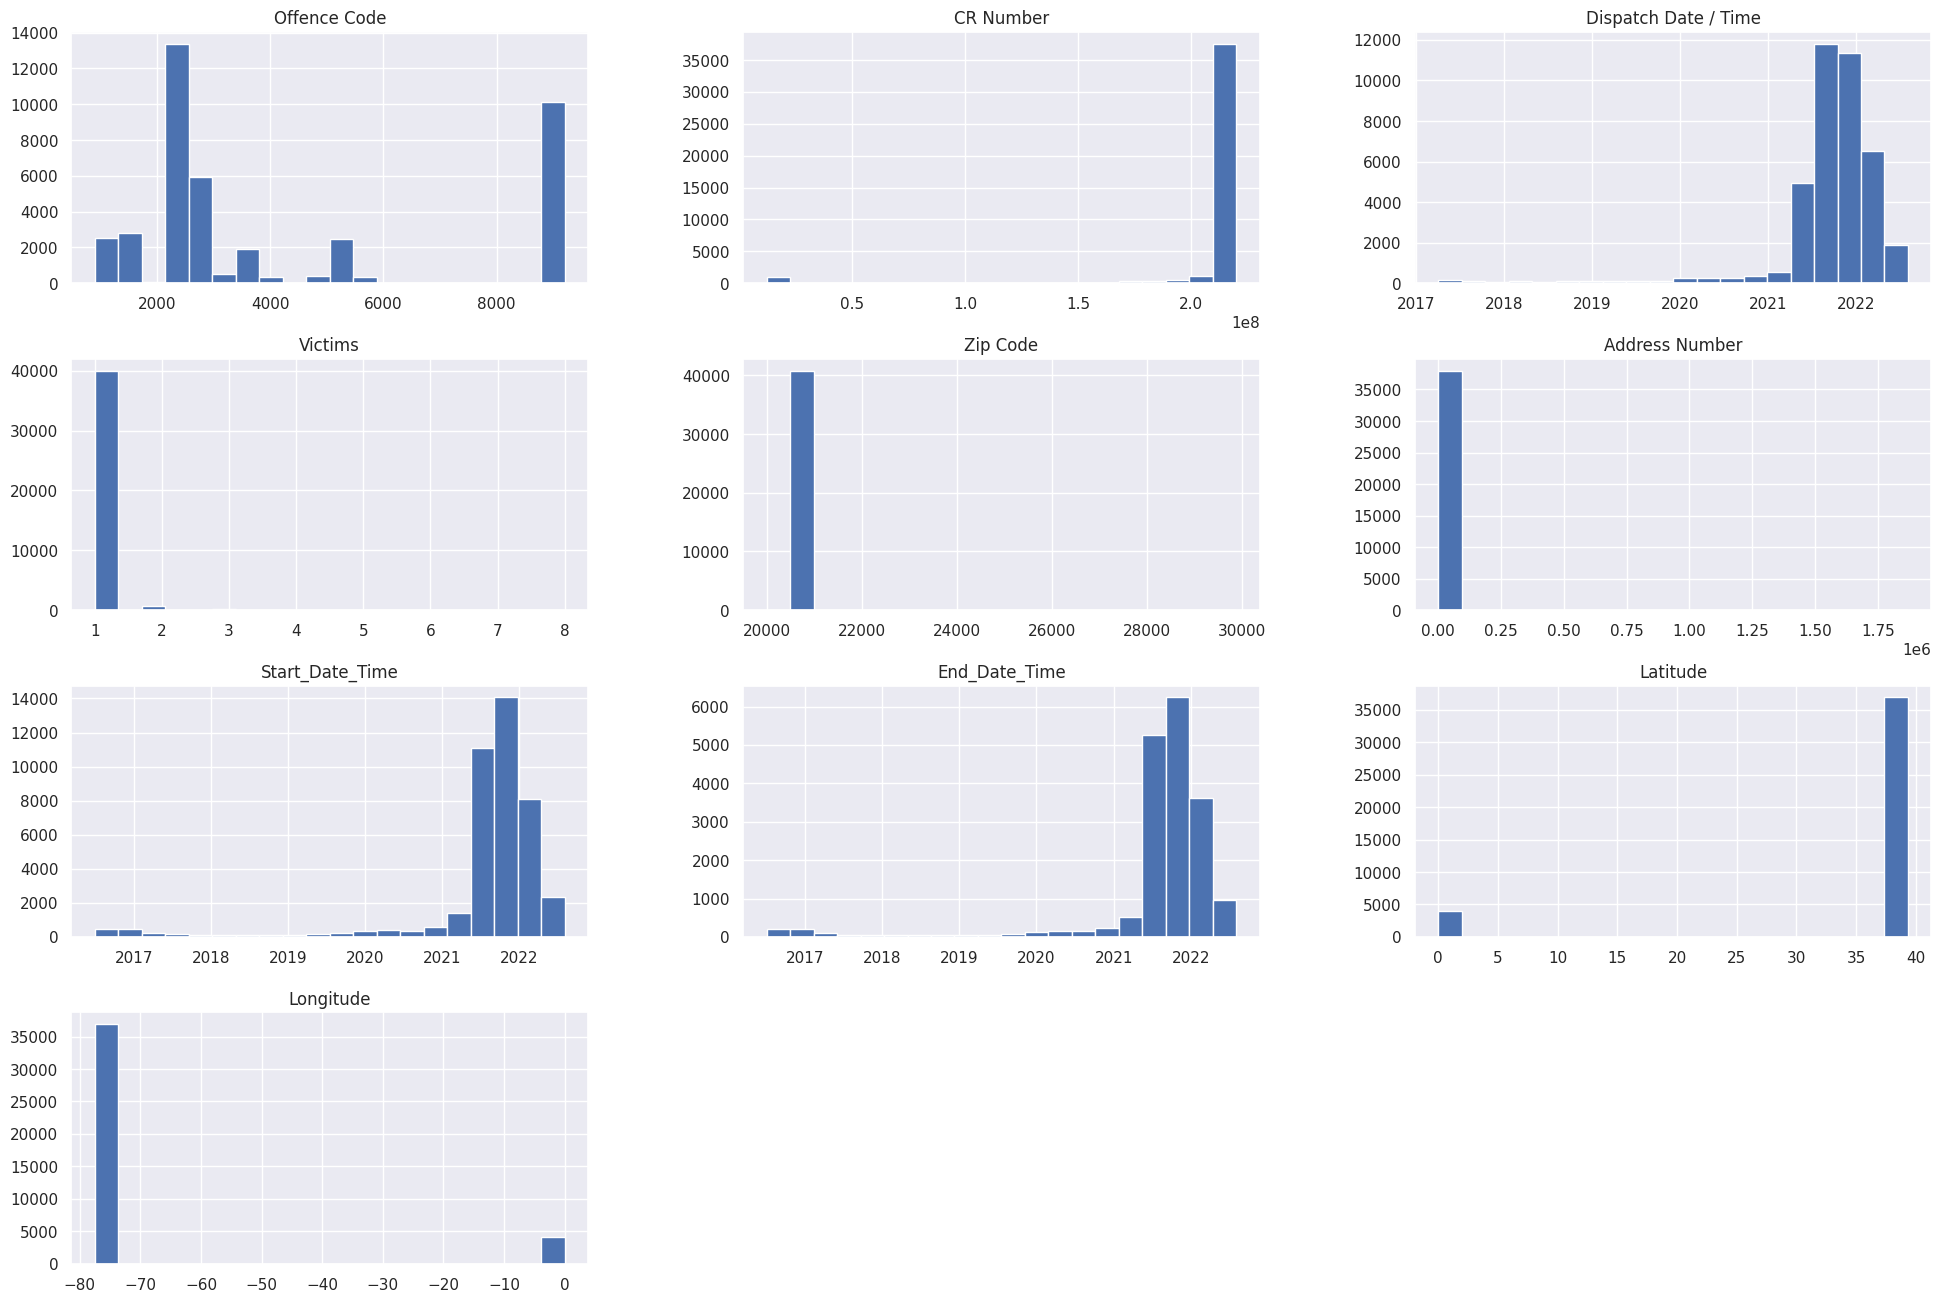

In [ ]:
fig=df.hist(bins=20, figsize=(24, 16))
plt.show()

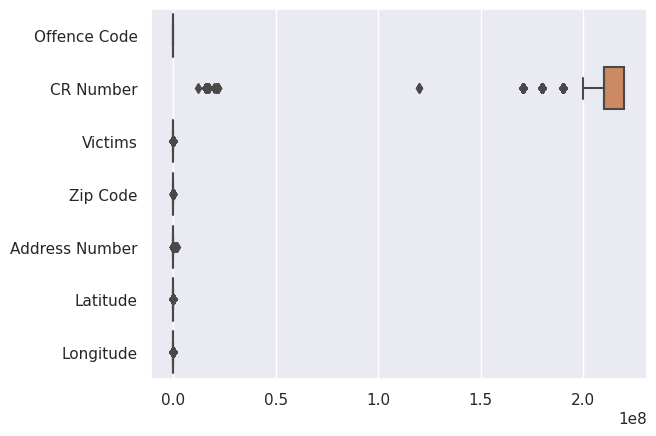

In [ ]:
sns.boxplot(data=df, orient='h')
plt.show()

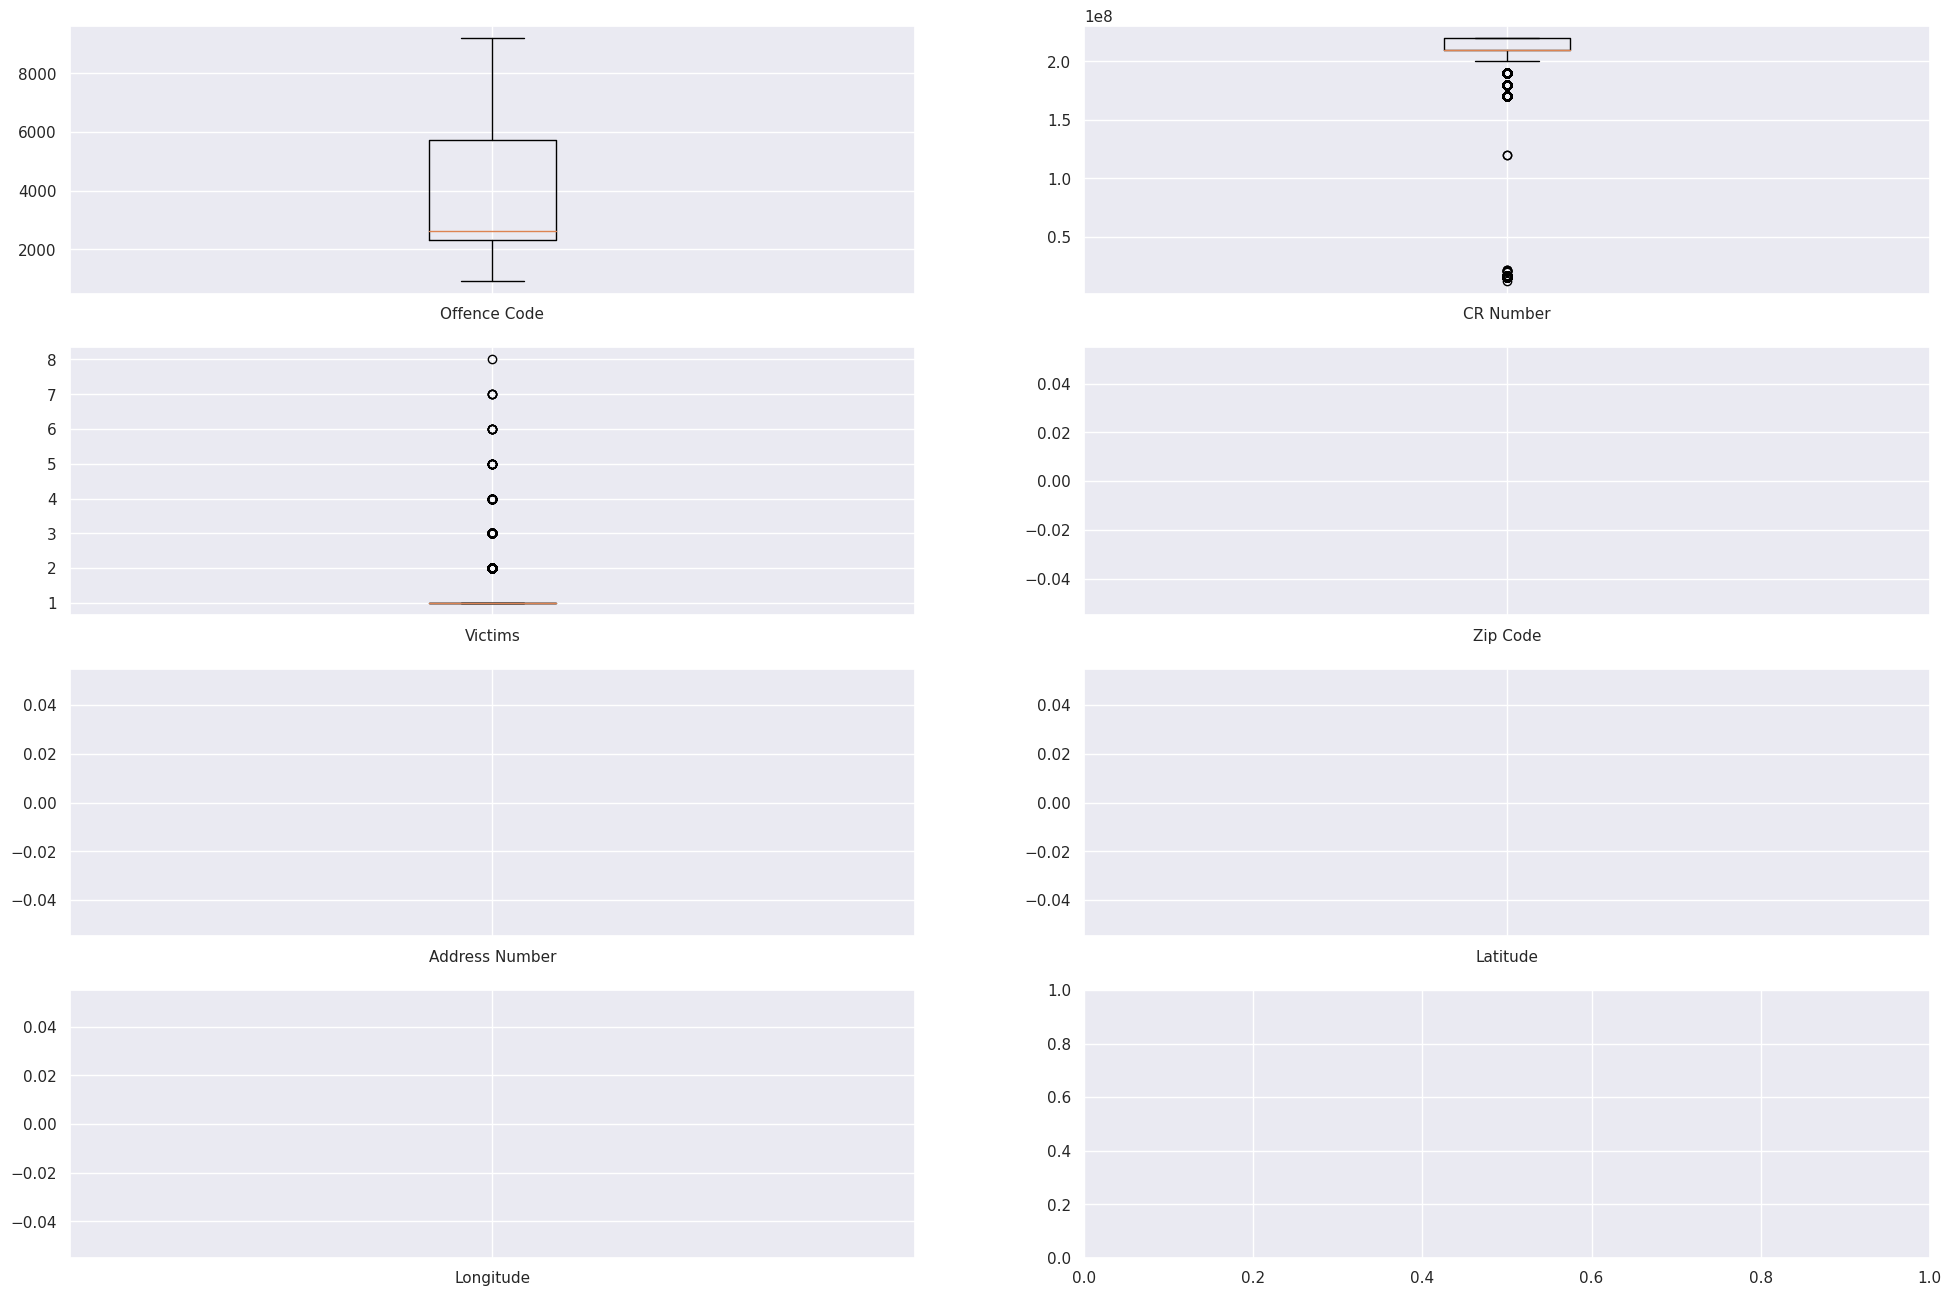

In [ ]:
fig
fig, ax = plt.subplots(4, 2,figsize=(24,16))

ax[0, 0].boxplot(df["Offence Code"],labels=["Offence Code"])
ax[0, 1].boxplot(df["CR Number"],labels=["CR Number"])
ax[1, 0].boxplot(df["Victims"],labels=["Victims"])
ax[1, 1].boxplot(df["Zip Code"],labels=["Zip Code"])
ax[2, 0].boxplot(df["Address Number"],labels=["Address Number"])
ax[2, 1].boxplot(df["Latitude"],labels=["Latitude"])
ax[3, 0].boxplot(df["Longitude"],labels=["Longitude"])



plt.show()

Exploring Categorical Variables

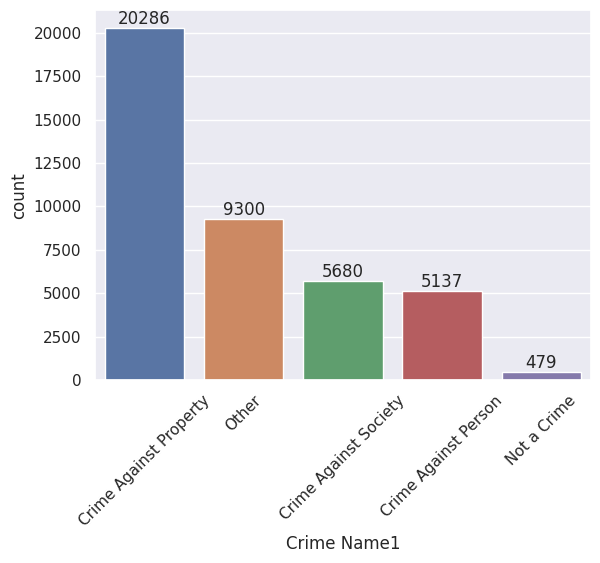

In [ ]:
  category_counts = df['Crime Name1'].value_counts()
df_sorted = df[df['Crime Name1'].isin(category_counts.index)].sort_values(by='Crime Name1', key=lambda x: x.map(category_counts))
plt.xticks(rotation=45)
sns.countplot(data=df_sorted, x='Crime Name1', order=category_counts.index)
for index, value in enumerate(category_counts):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')

plt.show()

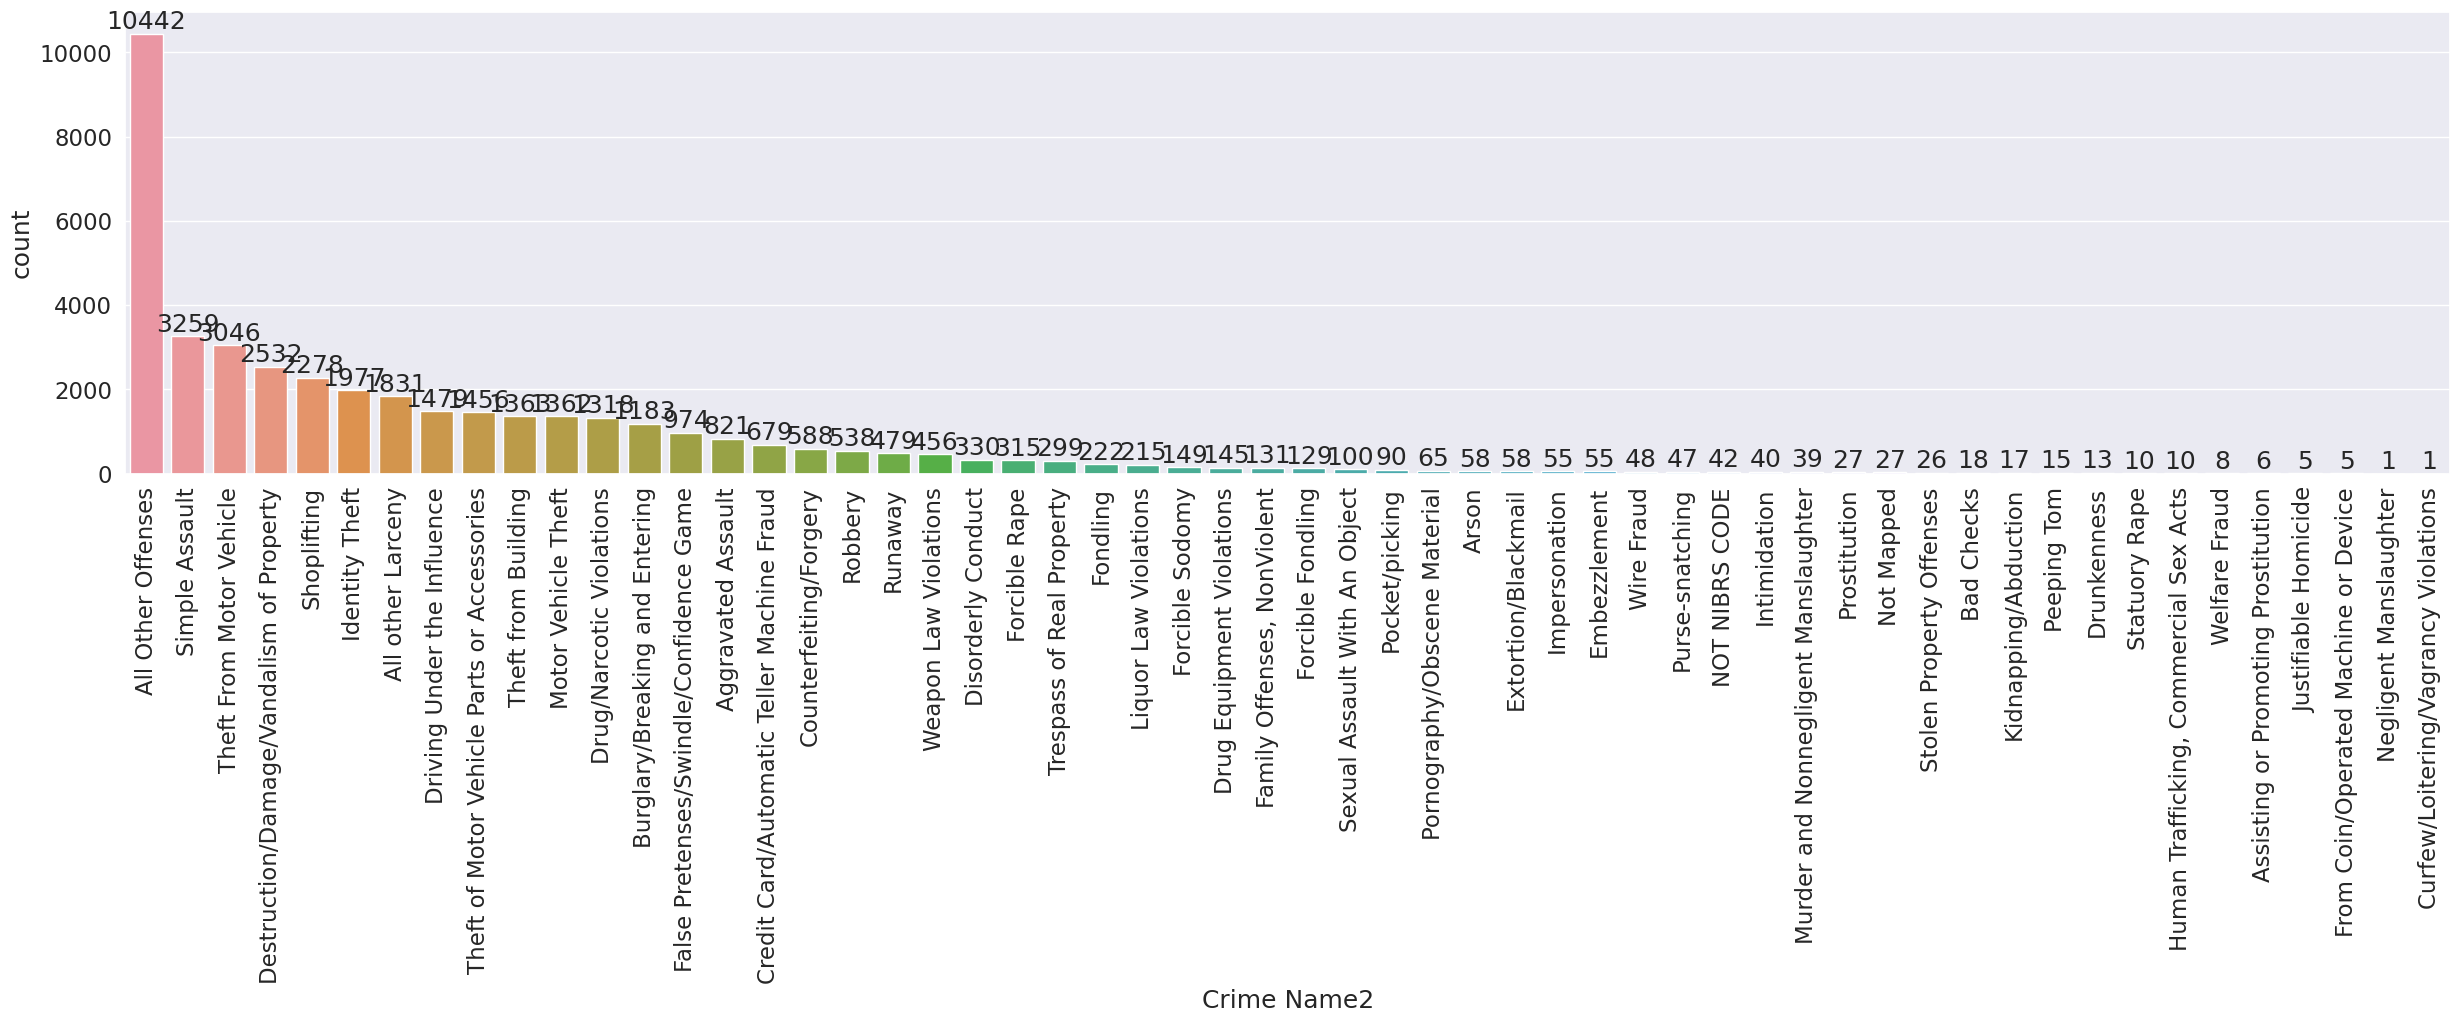

In [ ]:
plt.figure(figsize=(30, 6))
sns.set(font_scale=1.5)
category_counts2 = df['Crime Name2'].value_counts()
df_sorted2 = df[df['Crime Name2'].isin(category_counts2.index)].sort_values(by='Crime Name2', key=lambda x: x.map(category_counts2))
plt.xticks(rotation=90)
sns.countplot(data=df_sorted2, x='Crime Name2', order=category_counts2.index)
for index, value in enumerate(category_counts2):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')
plt.show()

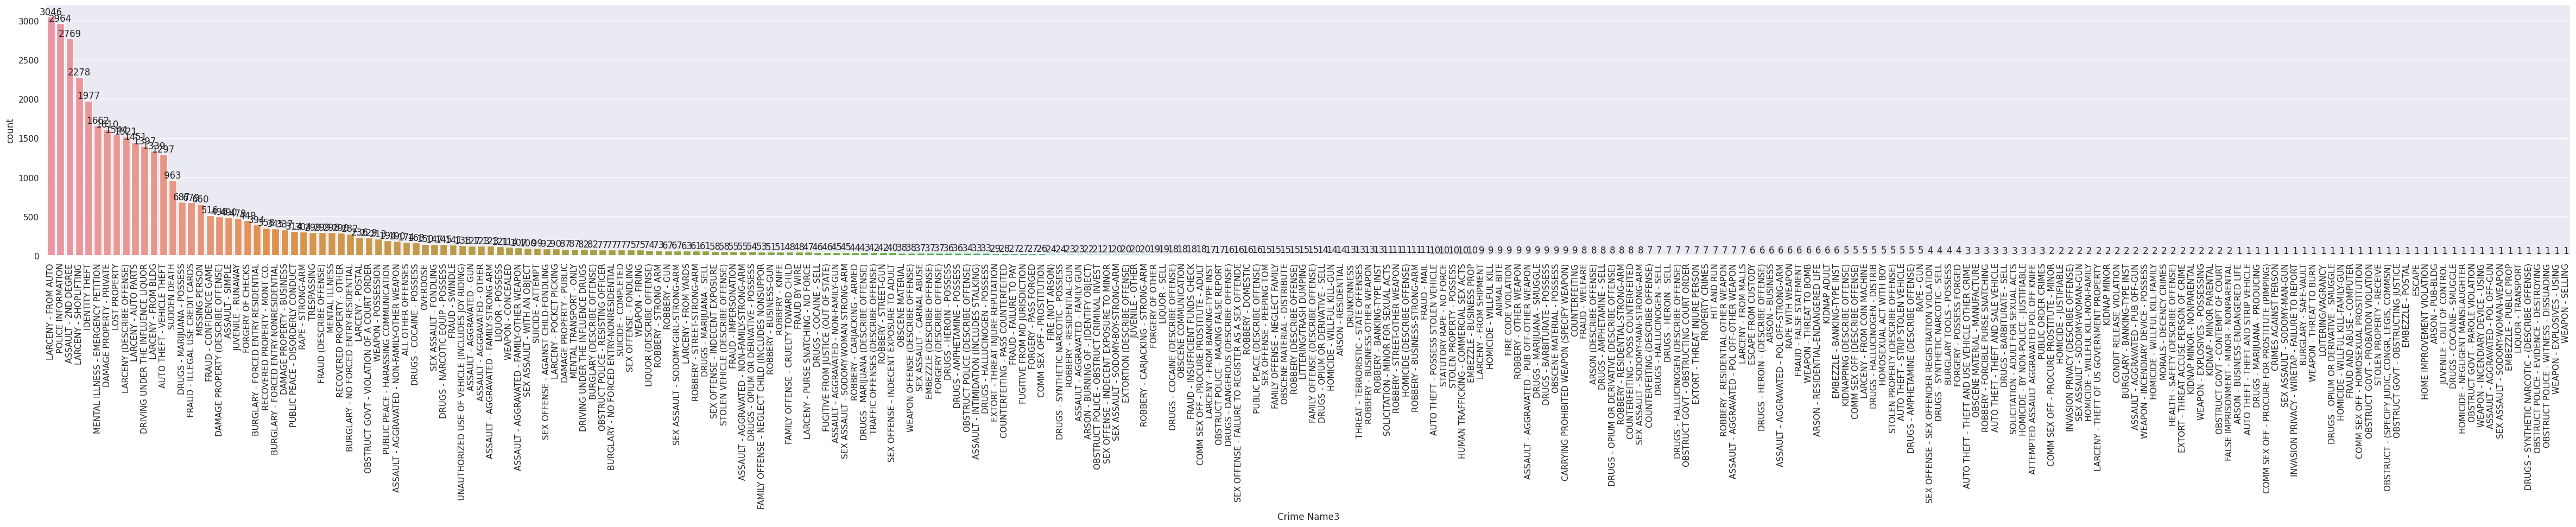

In [ ]:
plt.figure(figsize=(60, 6))
sns.set(font_scale=1)
category_counts3 = df['Crime Name3'].value_counts()
df_sorted3 = df[df['Crime Name3'].isin(category_counts3.index)].sort_values(by='Crime Name3', key=lambda x: x.map(category_counts3))
plt.xticks(rotation=90)
sns.countplot(data=df_sorted3, x='Crime Name3', order=category_counts3.index)
for index, value in enumerate(category_counts3):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')
plt.show()

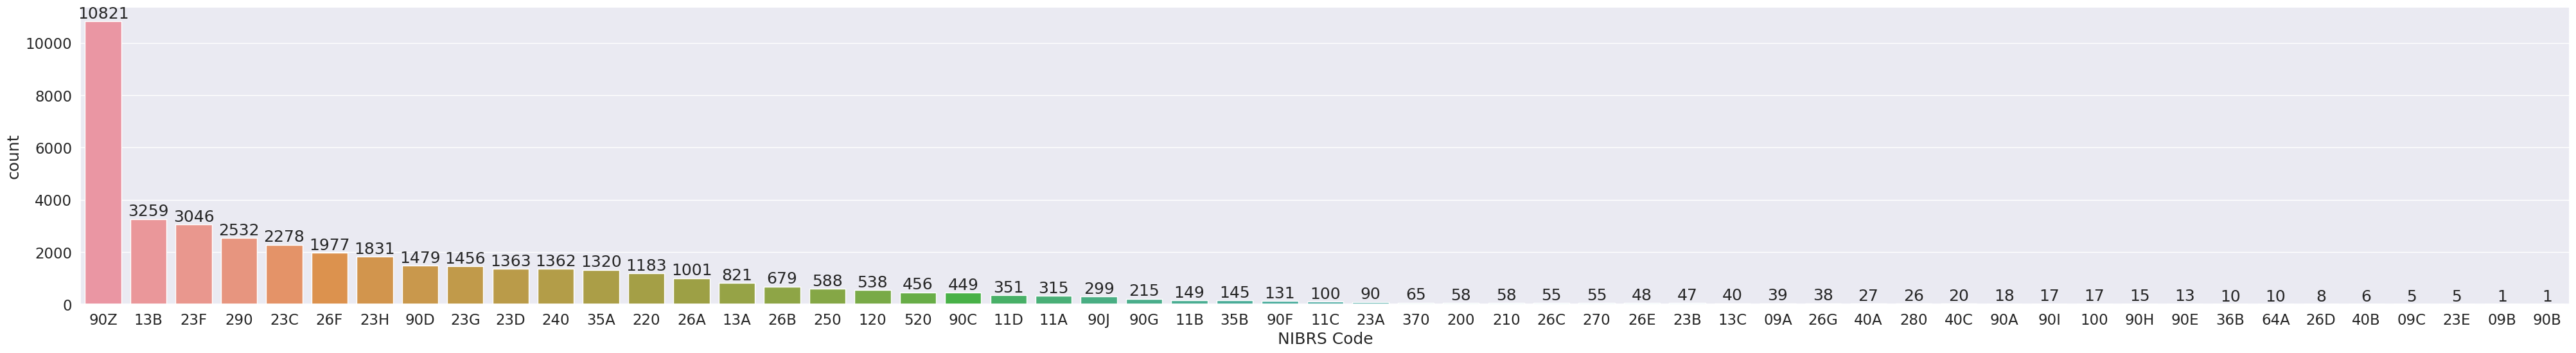

In [ ]:
plt.figure(figsize=(50, 6))
sns.set(font_scale=1.5)
category_counts4 = df['NIBRS Code'].value_counts()
df_sorted4 = df[df['NIBRS Code'].isin(category_counts4.index)].sort_values(by='NIBRS Code', key=lambda x: x.map(category_counts4))
plt.xticks(rotation=0)
sns.countplot(data=df_sorted4, x='NIBRS Code', order=category_counts4.index)
for index, value in enumerate(category_counts4):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')

plt.show()

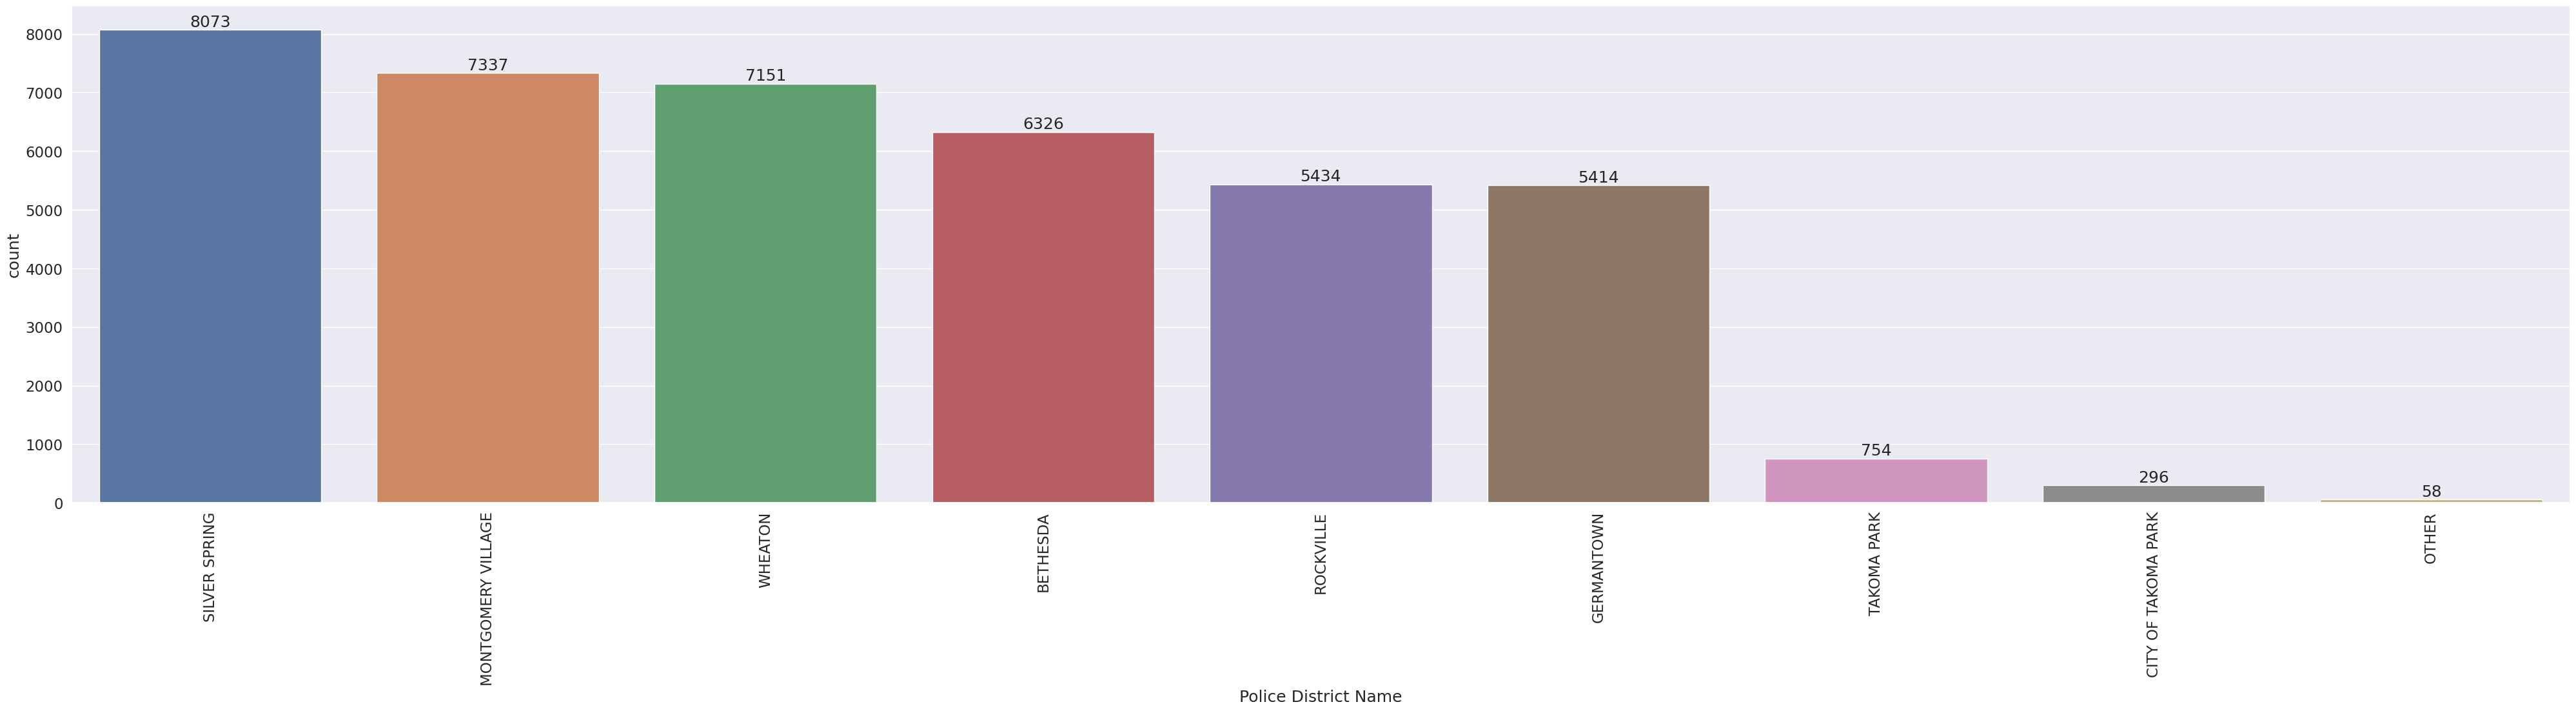

In [ ]:
plt.figure(figsize=(50, 10))
sns.set(font_scale=1.5)
category_counts5 = df['Police District Name'].value_counts()
df_sorted5 = df[df['Police District Name'].isin(category_counts5.index)].sort_values(by='Police District Name', key=lambda x: x.map(category_counts5))
plt.xticks(rotation=90)
sns.countplot(data=df_sorted5, x='Police District Name', order=category_counts5.index)
for index, value in enumerate(category_counts5):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')

plt.show()

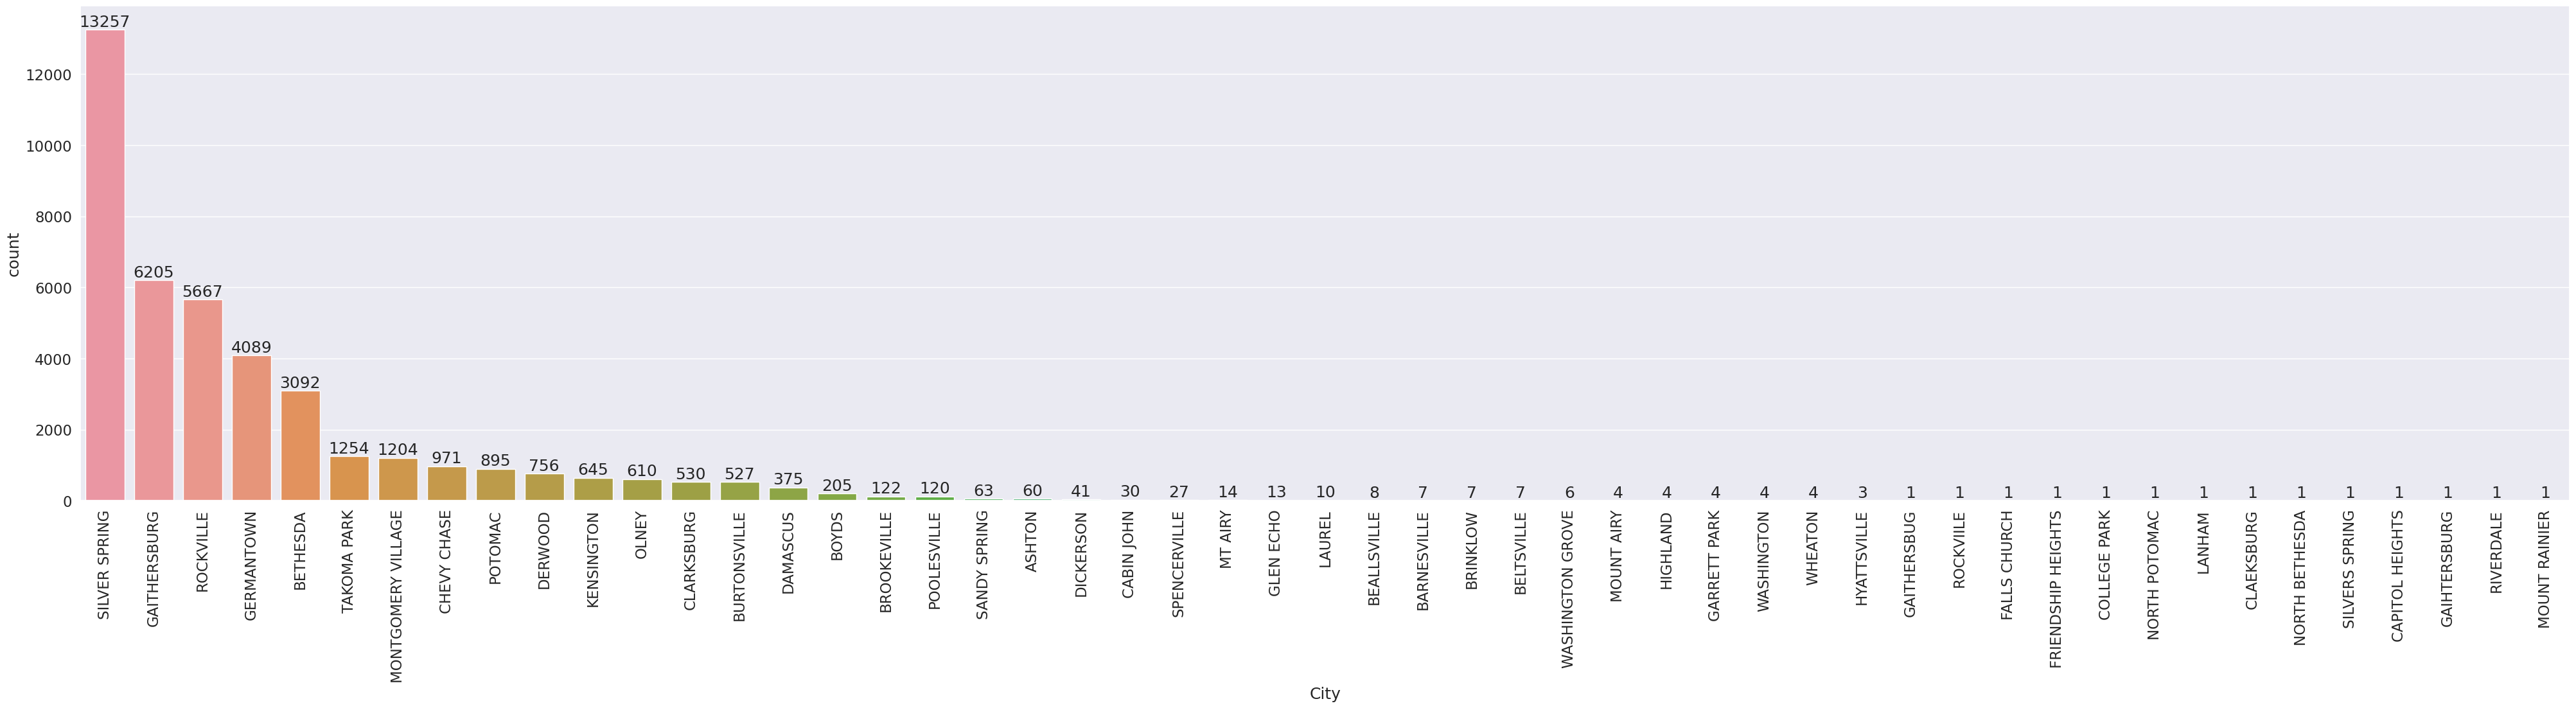

In [ ]:
plt.figure(figsize=(50, 10))
sns.set(font_scale=1.5)
category_counts6 = df['City'].value_counts()
df_sorted6 = df[df['City'].isin(category_counts6.index)].sort_values(by='City', key=lambda x: x.map(category_counts6))
plt.xticks(rotation=90)
sns.countplot(data=df_sorted6, x='City', order=category_counts6.index)
for index, value in enumerate(category_counts6):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')

plt.show()

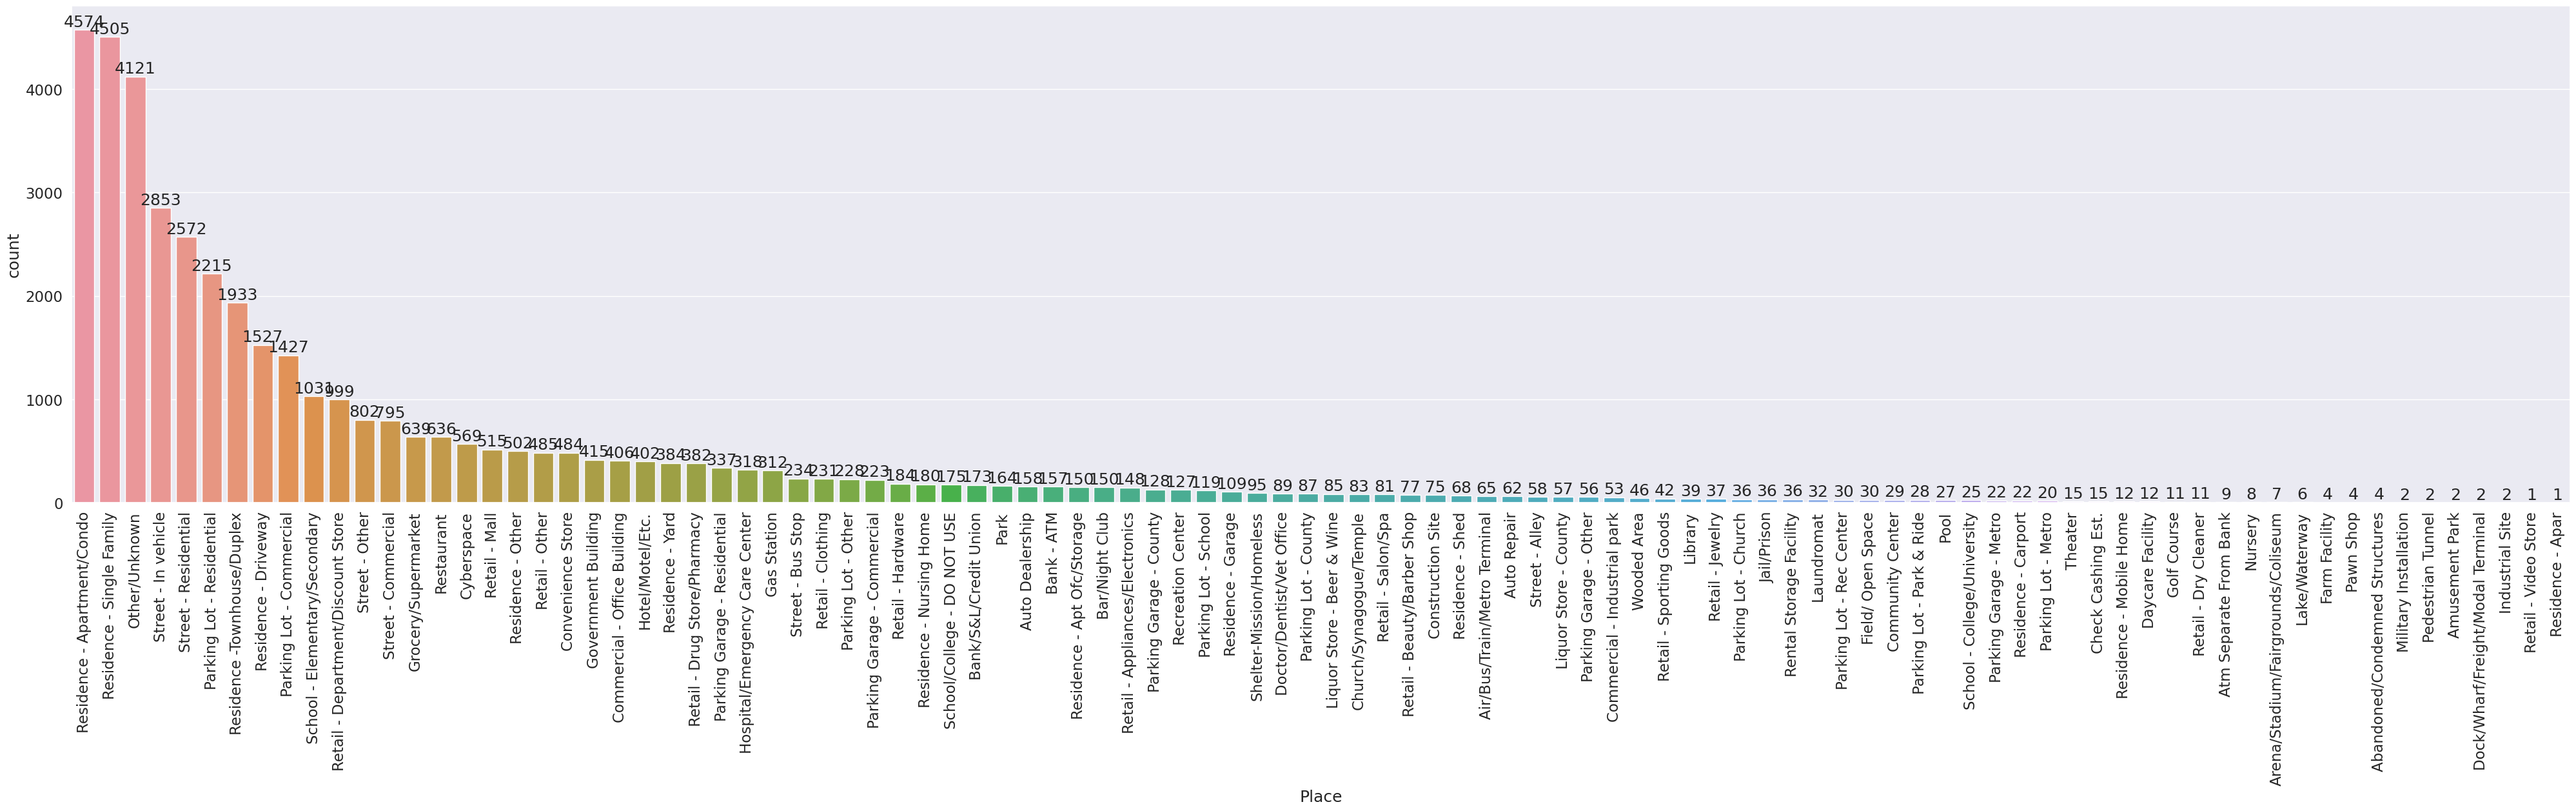

In [ ]:
plt.figure(figsize=(50, 10))
sns.set(font_scale=1.5)
category_counts7 = df['Place'].value_counts()
df_sorted7 = df[df['Place'].isin(category_counts7.index)].sort_values(by='Place', key=lambda x: x.map(category_counts7))
plt.xticks(rotation=90)
sns.countplot(data=df_sorted7, x='Place', order=category_counts7.index)
for index, value in enumerate(category_counts7):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')

plt.show()

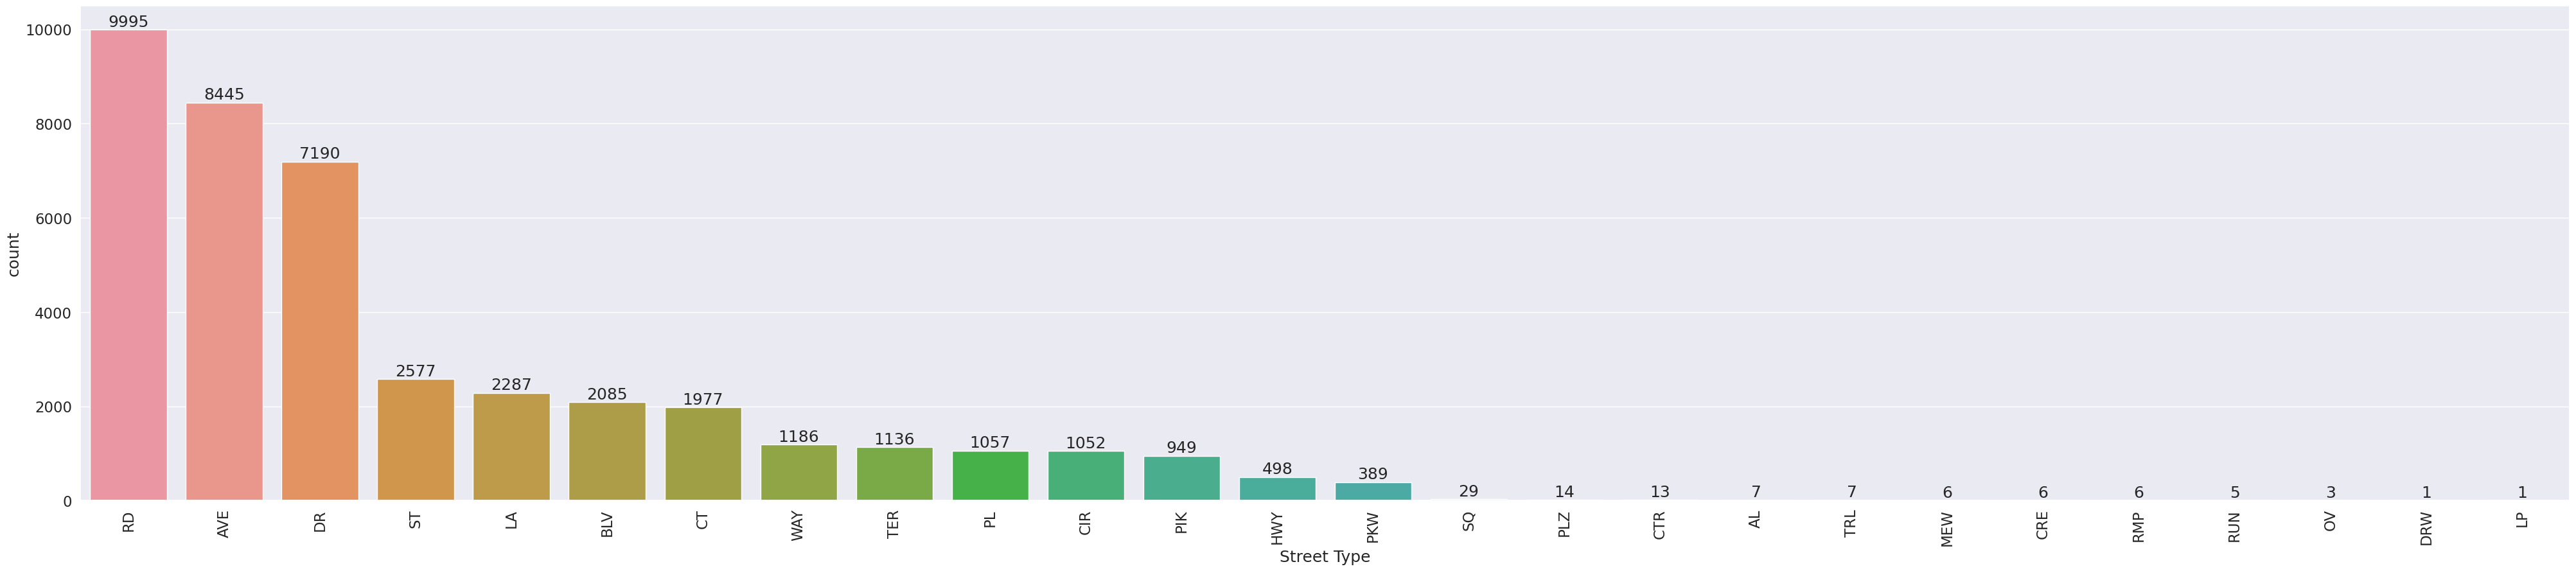

In [ ]:
plt.figure(figsize=(50, 10))
sns.set(font_scale=1.5)
category_counts8 = df['Street Type'].value_counts()
df_sorted8 = df[df['Street Type'].isin(category_counts8.index)].sort_values(by='Street Type', key=lambda x: x.map(category_counts8))
plt.xticks(rotation=90)
sns.countplot(data=df_sorted8, x='Street Type', order=category_counts8.index)
for index, value in enumerate(category_counts8):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')

plt.show()

Time Series Analysis

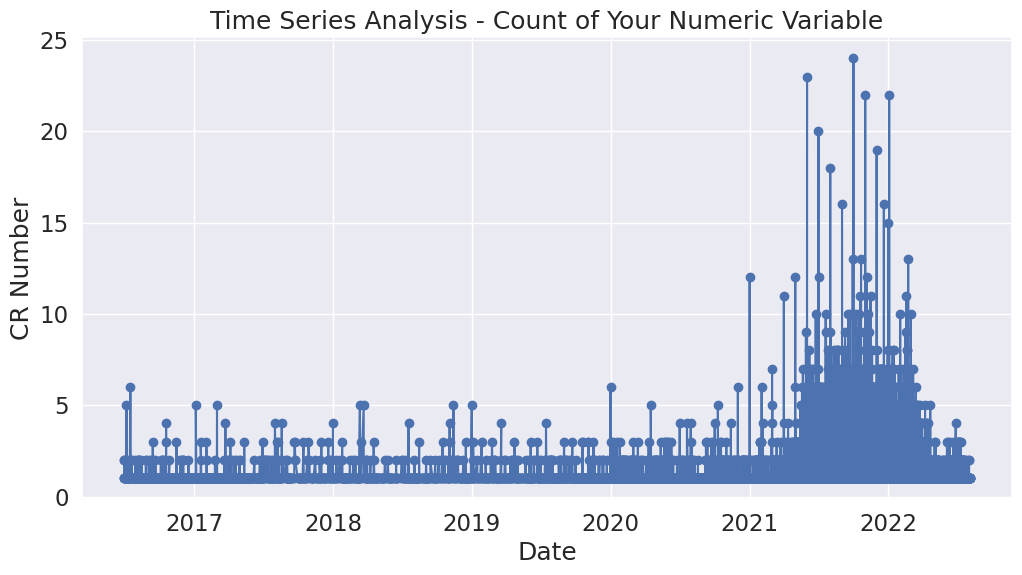

In [ ]:
count_df = df.groupby('Start_Date_Time')['CR Number'].count().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(count_df['Start_Date_Time'], count_df['CR Number'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('CR Number')
plt.title('Time Series Analysis - Count of Your Numeric Variable')
plt.show()

## Correlation Analysis

<ipython-input-161-b460d01d1029>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


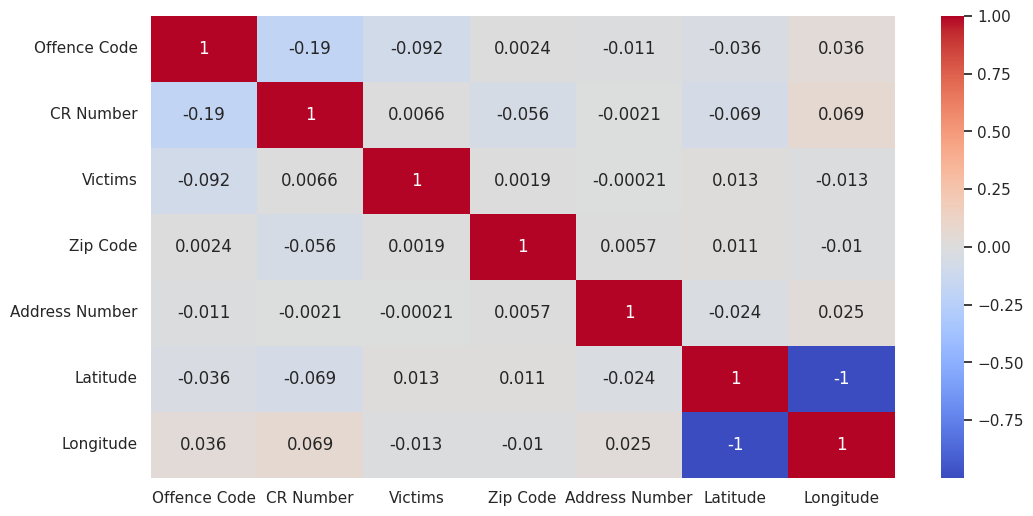

In [ ]:
plt.figure(figsize=(12, 6))
sns.set(font_scale=1)
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

<ipython-input-162-756ce1ca21ad>:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


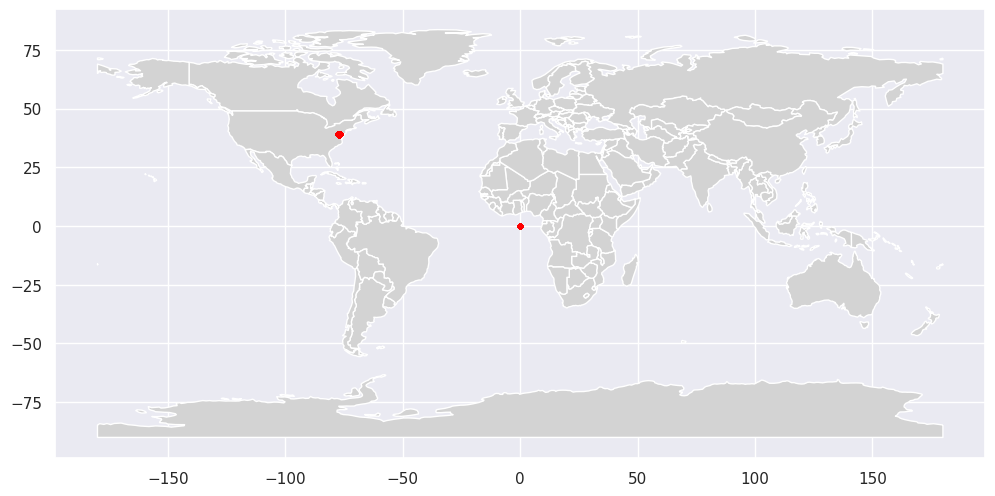

In [ ]:
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)


world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
usa = world[world['name'] == 'United States']
fig, ax = plt.subplots(figsize=(12, 8))
world.plot(ax=ax, color='lightgray')
gdf.plot(ax=ax, markersize=10, color='red', alpha=0.5)
plt.show()

<ipython-input-163-086266043295>:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


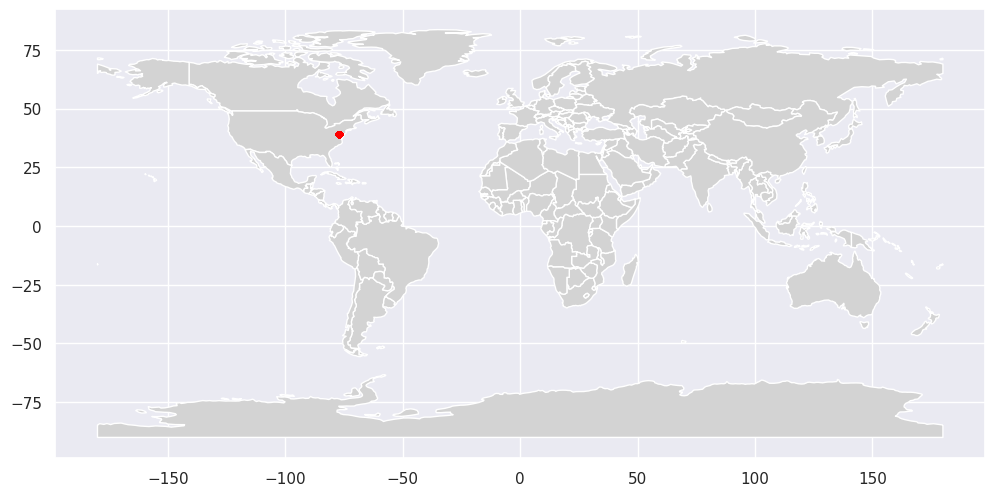

In [ ]:
df_filtered = df[(df['Latitude'] !=0) & (df['Longitude'] != 0)]
geometry = [Point(xy) for xy in zip(df_filtered['Longitude'], df_filtered['Latitude'])]
gdf = gpd.GeoDataFrame(df_filtered, geometry=geometry)


world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
usa = world[world['name'] == 'United States']
fig, ax = plt.subplots(figsize=(12, 8))
world.plot(ax=ax, color='lightgray')
gdf.plot(ax=ax, markersize=10, color='red', alpha=0.5)

plt.show()

In [198]:
df_filtered2 = df.dropna(subset=['Latitude', 'Longitude'])
df_filtred2 = df_filtered2[(df_filtered2['Latitude'] != 0) & (df_filtered2['Longitude'] != 0) & df_filtered2["Crime Name2"]=="Aggravated Assault"]

silver_spring_data = df_filtered2[df_filtered2['Police District Name'] == 'SILVER SPRING']
silver_spring_heatmap = folium.Map(location=[silver_spring_data['Latitude'].mean(), silver_spring_data['Longitude'].mean()], zoom_start=11)
HeatMap([[row['Latitude'], row['Longitude']] for _, row in silver_spring_data.iterrows()]).add_to(silver_spring_heatmap)
display(folium.LayerControl().add_to(silver_spring_heatmap))
display(silver_spring_heatmap)

Grouping Analysis

In [ ]:
grouped_data = df.groupby(['Crime Name1', 'Crime Name2']).size().reset_index(name='count')

sorted_data = grouped_data.sort_values(by='count', ascending=False)


sorted_data


Crime Name1                                  Crime Name2  count
56                   Other                           All Other Offenses   9231
13    Crime Against Person                               Simple Assault   3259
35  Crime Against Property                     Theft From Motor Vehicle   3046
22  Crime Against Property     Destruction/Damage/Vandalism of Property   2532
33  Crime Against Property                                  Shoplifting   2278
27  Crime Against Property                               Identity Theft   1977
16  Crime Against Property                            All other Larceny   1831
44   Crime Against Society                  Driving Under the Influence   1479
37  Crime Against Property  Theft of Motor Vehicle Parts or Accessories   1456
36  Crime Against Property                          Theft from Building   1363
29  Crime Against Property                          Motor Vehicle Theft   1362
46   Crime Against Society                     Drug/Narcotic Violations   1318
19  Crime Against Property               Burglary/Breaking and Entering   1183
40   Crime Against Society                           All Other Offenses   1180
25  Crime Against Property      False Pretenses/Swindle/Confidence Game    974
0     Crime Against Person                           Aggravated Assault    821
21  Crime Against Property   Credit Card/Automatic Teller Machine Fraud    679
20  Crime Against Property                       Counterfeiting/Forgery    588
32  Crime Against Property                                      Robbery    538
55             Not a Crime                                      Runaway    479
54   Crime Against Society                        Weapon Law Violations    456
43   Crime Against Society                           Disorderly Conduct    330
4     Crime Against Person                                Forcible Rape    315
53   Crime Against Society                    Trespass of Real Property    299
2     Crime Against Person                                     Fondling    222
49   Crime Against Society                        Liquor Law Violations    215
5     Crime Against Person                              Forcible Sodomy    149
45   Crime Against Society                    Drug Equipment Violations    145
48   Crime Against Society                  Family Offenses, NonViolent    131
3     Crime Against Person                            Forcible Fondling    129
12    Crime Against Person                Sexual Assault With An Object    100
30  Crime Against Property                               Pocket/picking     90
51   Crime Against Society                 Pornography/Obscene Material     65
24  Crime Against Property                          Extortion/Blackmail     58
17  Crime Against Property                                        Arson     58
28  Crime Against Property                                Impersonation     55
23  Crime Against Property                                 Embezzlement     55
39  Crime Against Property                                   Wire Fraud     48
31  Crime Against Property                              Purse-snatching     47
57                   Other                               NOT NIBRS CODE     42
7     Crime Against Person                                 Intimidation     40
10    Crime Against Person         Murder and Nonnegligent Manslaughter     39
58                   Other                                   Not Mapped     27
52   Crime Against Society                                 Prostitution     27
34  Crime Against Property                     Stolen Property Offenses     26
1     Crime Against Person                           All Other Offenses     20
18  Crime Against Property                                   Bad Checks     18
9     Crime Against Person                         Kidnapping/Abduction     17
50   Crime Against Society                                  Peeping Tom     15
47   Crime Against Society                                  Drunk

In [ ]:
grouped_data = df.groupby(['Crime Name2', 'Crime Name3']).size().reset_index(name='count')

sorted_data = grouped_data.sort_values(by='count', ascending=False)


sorted_data.loc[sorted_data["Crime Name2"]=="Destruction/Damage/Vandalism of Property"]


Crime Name2  \
110  Destruction/Damage/Vandalism of Property   
108  Destruction/Damage/Vandalism of Property   
109  Destruction/Damage/Vandalism of Property   
111  Destruction/Damage/Vandalism of Property   

                            Crime Name3  count  
110           DAMAGE PROPERTY - PRIVATE   1610  
108  DAMAGE PROPERTY (DESCRIBE OFFENSE)    498  
109          DAMAGE PROPERTY - BUSINESS    337  
111            DAMAGE PROPERTY - PUBLIC     87

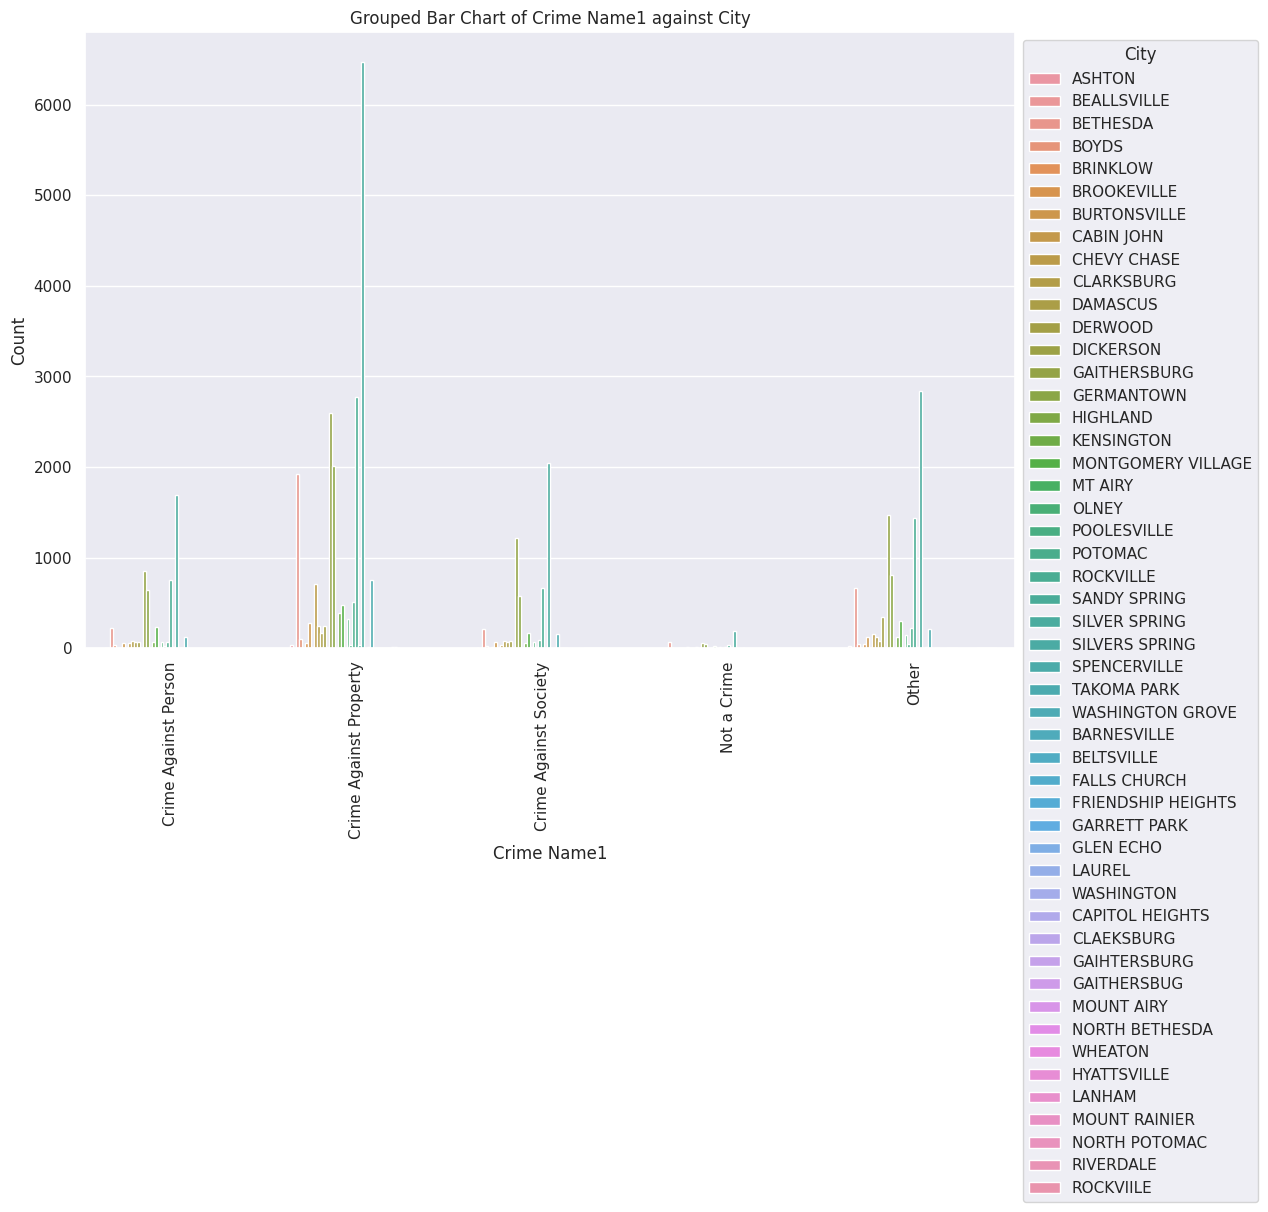

In [171]:
sns.set_theme()

grouped_data = df.groupby(['Crime Name1', 'City']).size().reset_index(name='count')

plt.figure(figsize=(12, 8))
sns.barplot(x='Crime Name1', y='count', hue='City', data=grouped_data)
plt.title('Grouped Bar Chart of Crime Name1 against City')
plt.xlabel('Crime Name1')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right')
plt.legend(title='City', bbox_to_anchor=(1, 1))
plt.show()


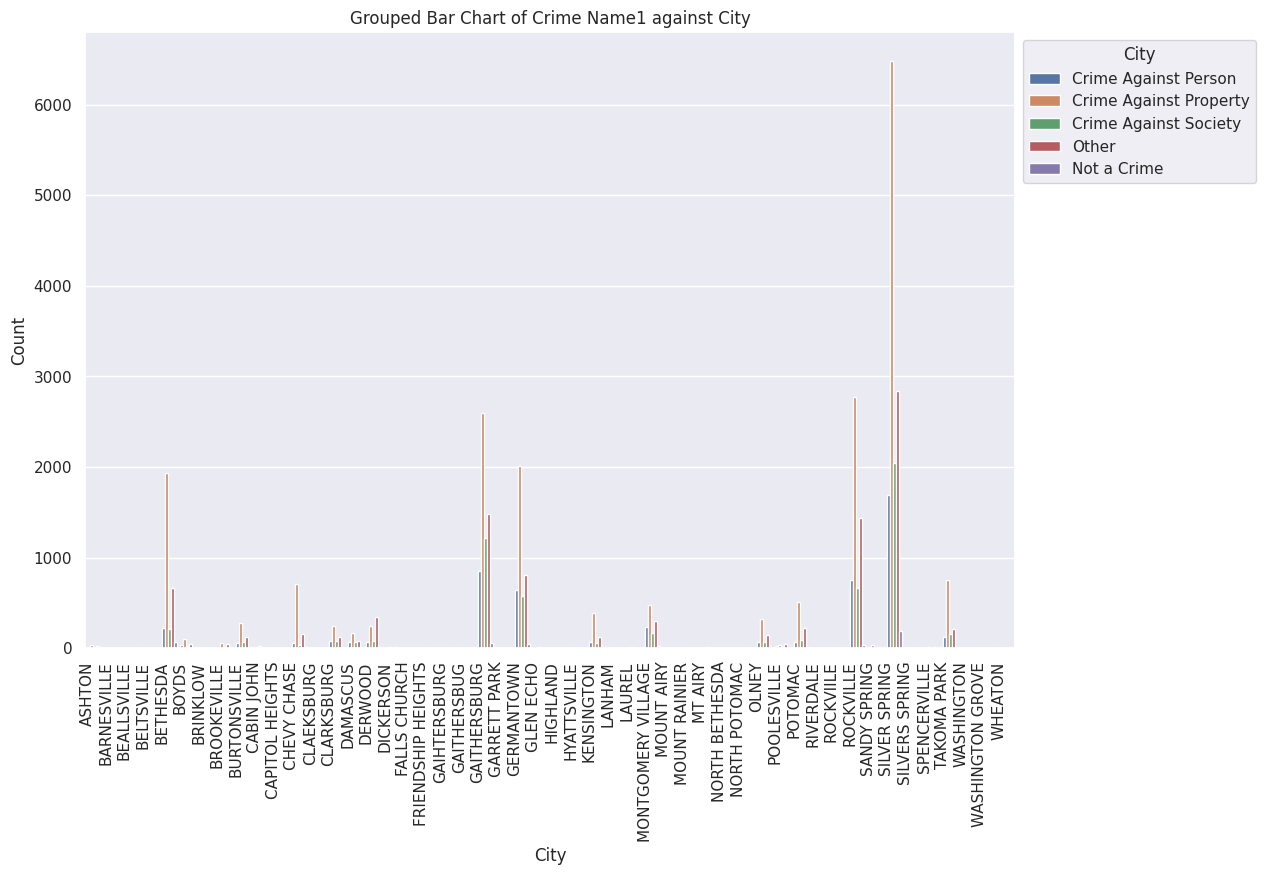

In [172]:
sns.set_theme()

grouped_data = df.groupby(['City', 'Crime Name1']).size().reset_index(name='count')

plt.figure(figsize=(12, 8))
sns.barplot(x='City', y='count', hue='Crime Name1', data=grouped_data)
plt.title('Grouped Bar Chart of Crime Name1 against City')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right')
plt.legend(title='City', bbox_to_anchor=(1, 1))
plt.show()


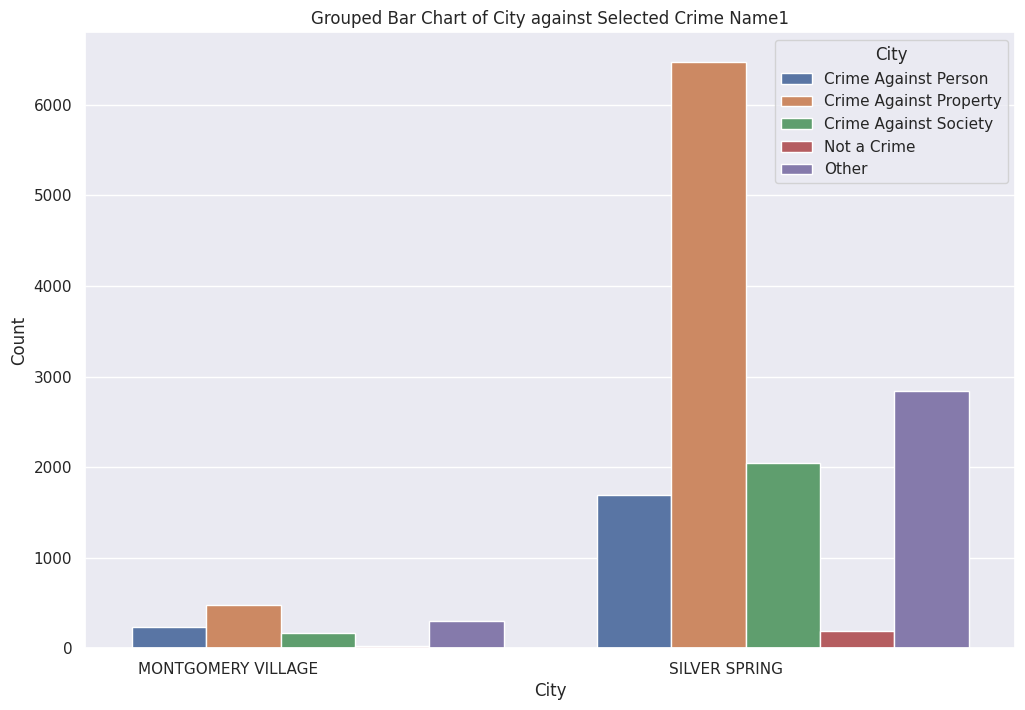

In [187]:
filtered_cities = ["SILVER SPRING", "MONTGOMERY VILLAGE"]
filtered_df = df[df['City'].isin(filtered_cities)]


grouped_data = filtered_df.groupby(['City', 'Crime Name1']).size().reset_index(name='count')


plt.figure(figsize=(12, 8))
sns.barplot(x='City', y='count', hue='Crime Name1', data=grouped_data)
plt.title('Grouped Bar Chart of City against Selected Crime Name1')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=0, ha='right')
plt.legend(title='City', bbox_to_anchor=(1, 1))

plt.show()


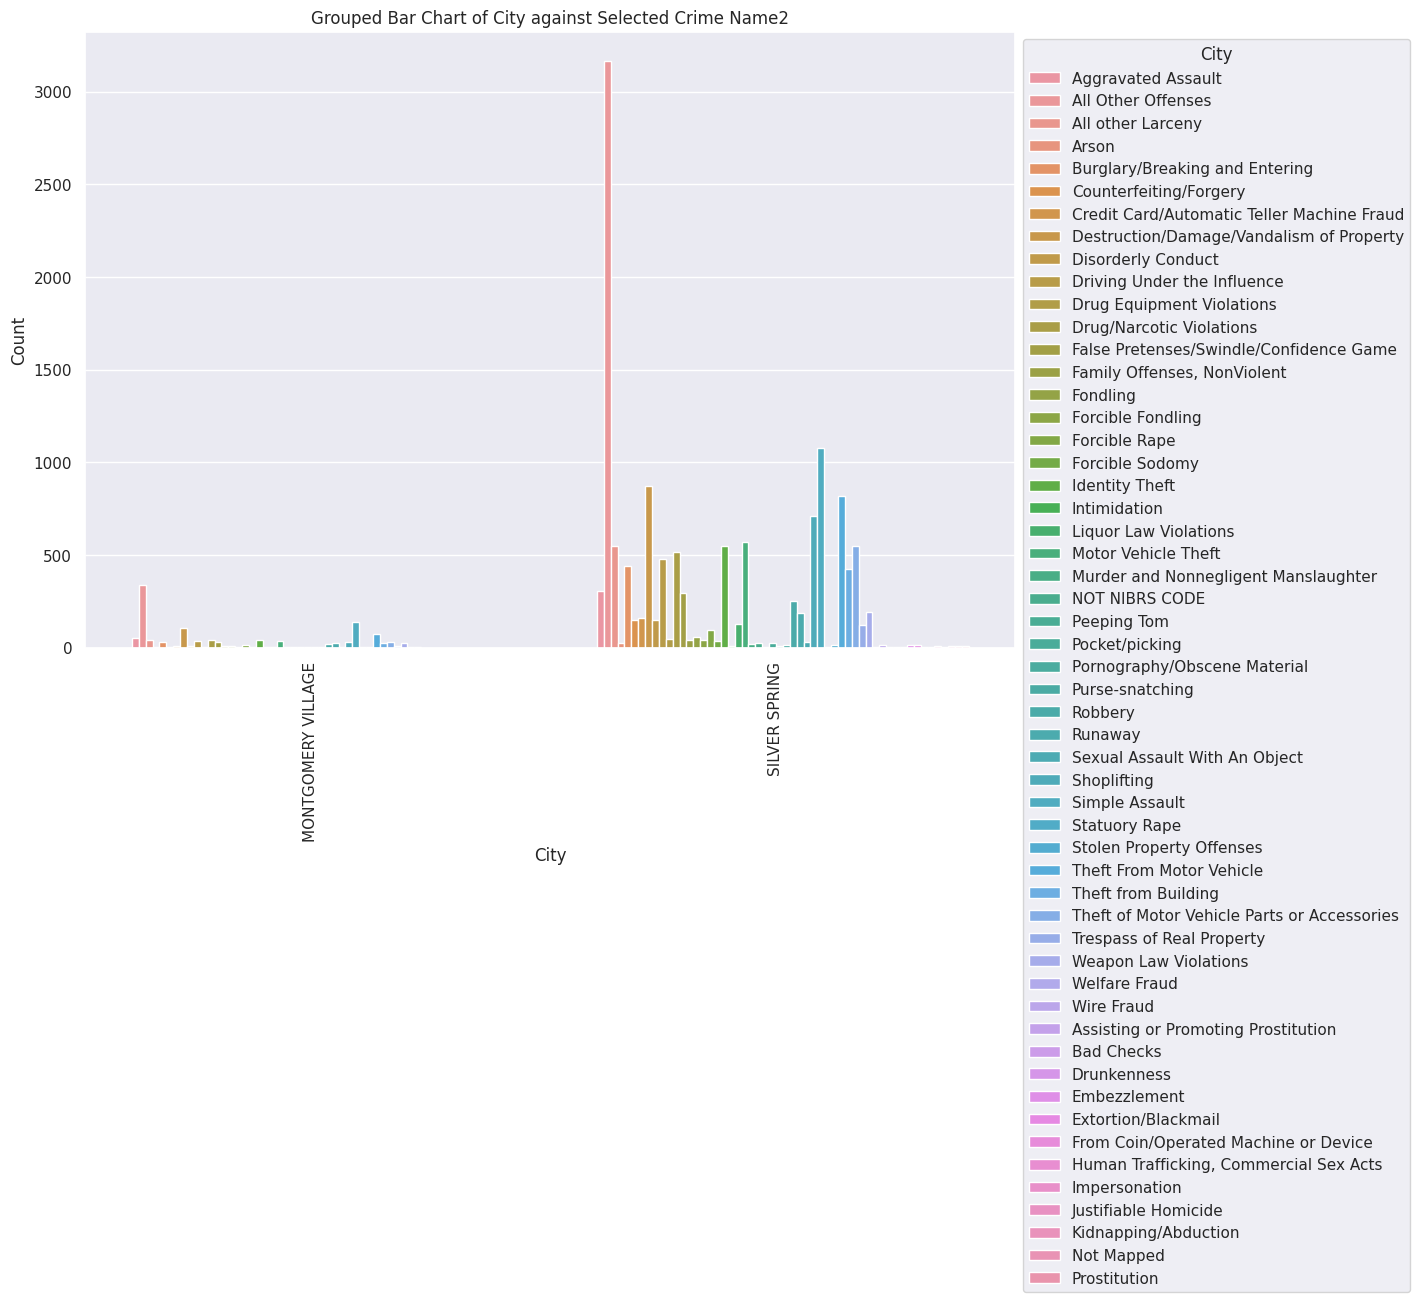

In [179]:
filtered_cities = ["SILVER SPRING", "MONTGOMERY VILLAGE"]
filtered_df = df[df['City'].isin(filtered_cities)]


grouped_data = filtered_df.groupby(['City', 'Crime Name2']).size().reset_index(name='count')


plt.figure(figsize=(12, 8))
sns.barplot(x='City', y='count', hue='Crime Name2', data=grouped_data)
plt.title('Grouped Bar Chart of City against Selected Crime Name2')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right')
plt.legend(title='City', bbox_to_anchor=(1, 1))

plt.show()


In [184]:
filtered_places = ["Residence - Apartment/Condo", "Residence - Single Family"]
filtered_df = df[df['City'].isin(filtered_places)]


grouped_data = filtered_df.groupby(['City', 'Crime Name2']).size().reset_index(name='count')


plt.figure(figsize=(12, 8))
sns.barplot(x='Place', y='count', hue='Crime Name2', data=grouped_data)
plt.title('Grouped Bar Chart of City against Selected Crime Name3')
plt.xlabel('Place')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right')
plt.legend(title='City', bbox_to_anchor=(1, 1))

plt.show()


ValueError: ignored

<Figure size 1200x800 with 0 Axes>

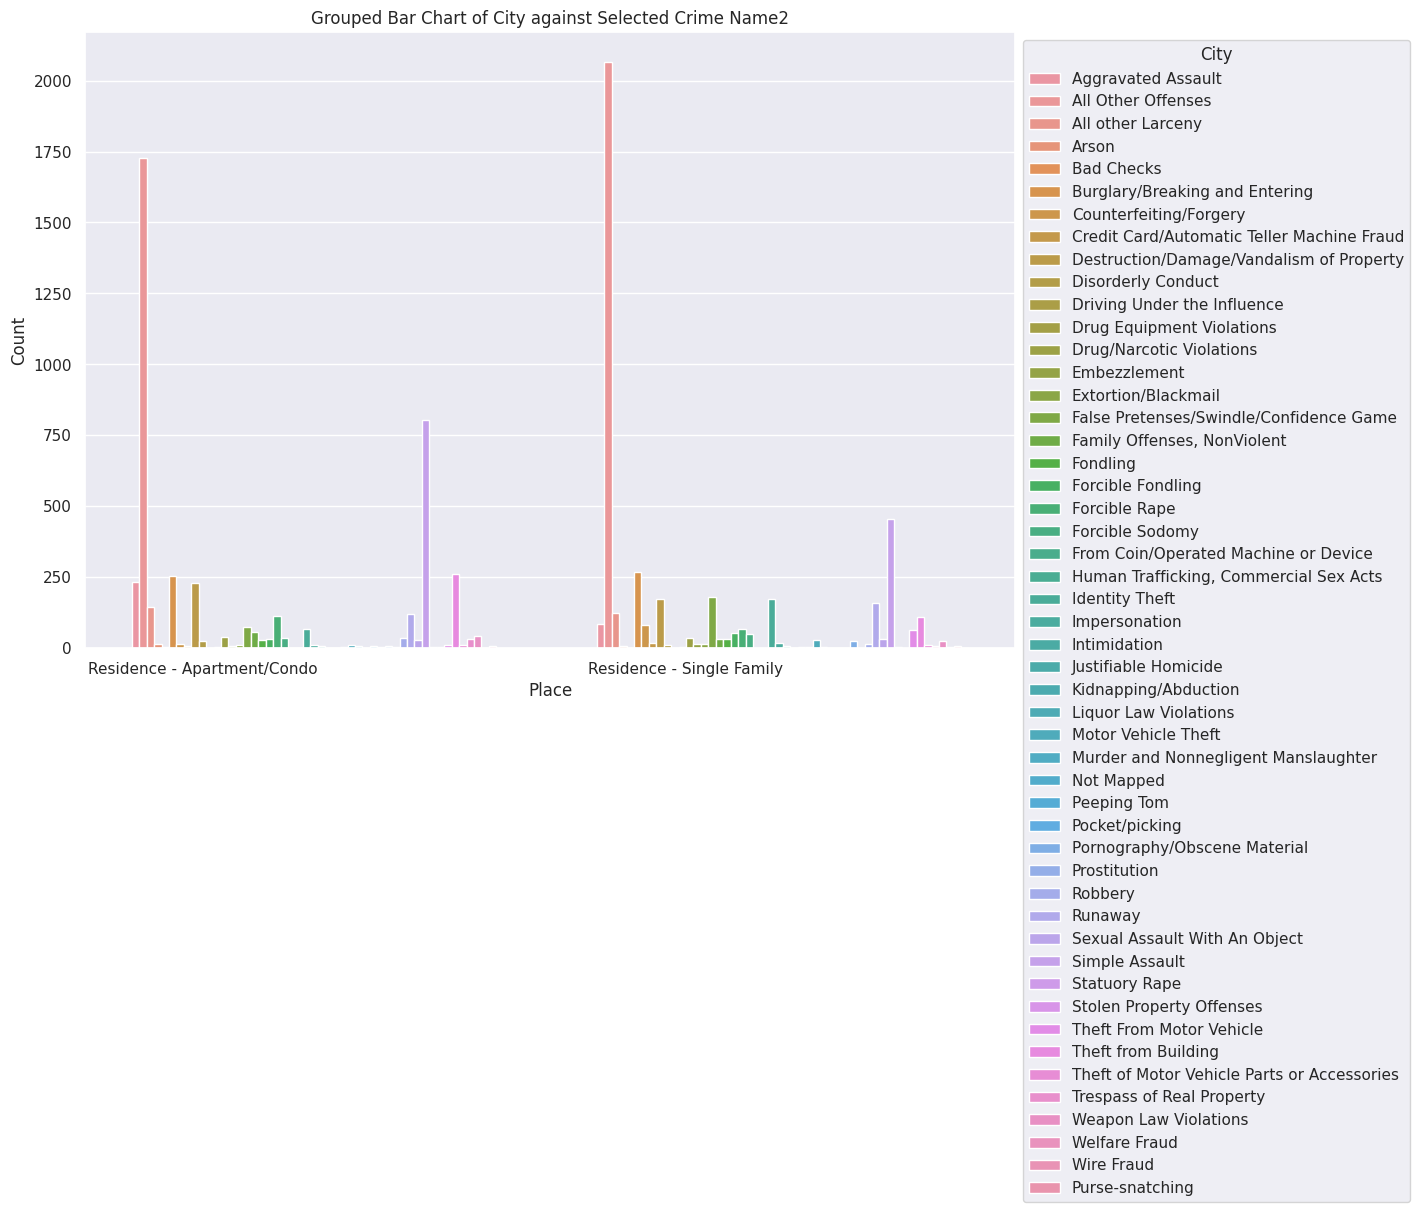

In [194]:
filtered_places = ["Residence - Apartment/Condo", "Residence - Single Family"]
filtered_df = df[df['Place'].isin(filtered_places)]


grouped_data = filtered_df.groupby(['Place', 'Crime Name2']).size().reset_index(name='count')


plt.figure(figsize=(12, 8))
sns.barplot(x='Place', y='count', hue='Crime Name2', data=grouped_data)
plt.title('Grouped Bar Chart of City against Selected Crime Name2')
plt.xlabel('Place')
plt.ylabel('Count')
plt.xticks(rotation=0, ha='right')
plt.legend(title='City', bbox_to_anchor=(1, 1))

plt.show()


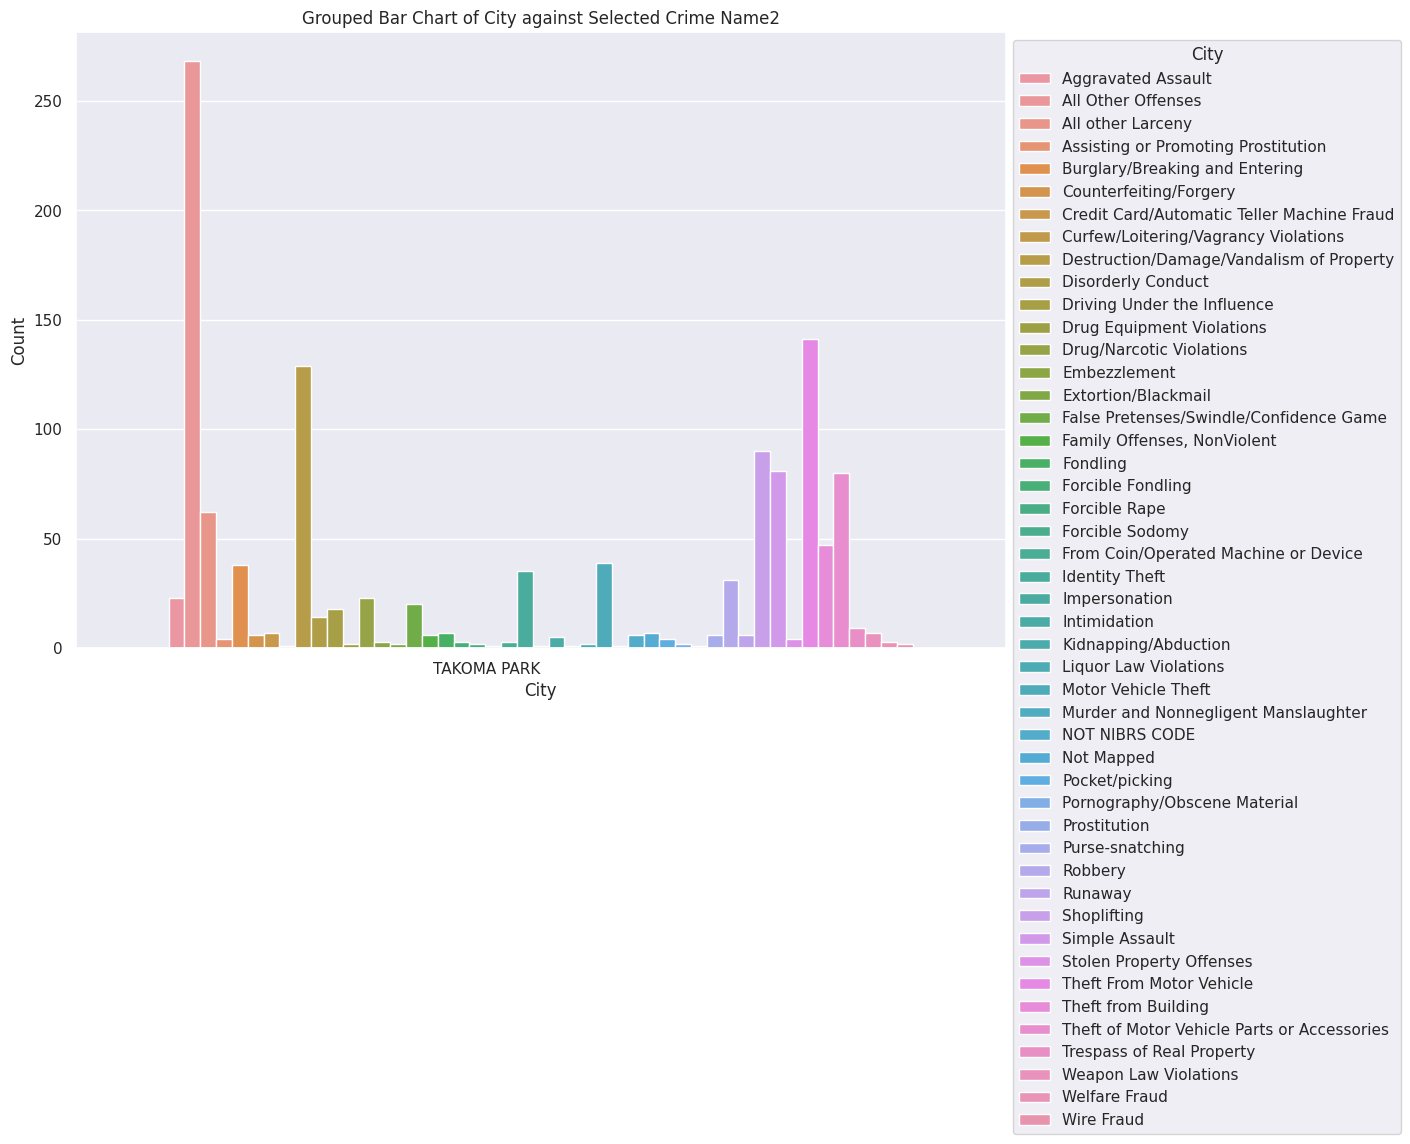

In [195]:
filtered_cities = ["TAKOMA PARK", "CITY OF TAKOMA PARK"]
filtered_df = df[df['City'].isin(filtered_cities)]


grouped_data = filtered_df.groupby(['City', 'Crime Name2']).size().reset_index(name='count')


plt.figure(figsize=(12, 8))
sns.barplot(x='City', y='count', hue='Crime Name2', data=grouped_data)
plt.title('Grouped Bar Chart of City against Selected Crime Name2')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=0, ha='right')
plt.legend(title='City', bbox_to_anchor=(1, 1))

plt.show()


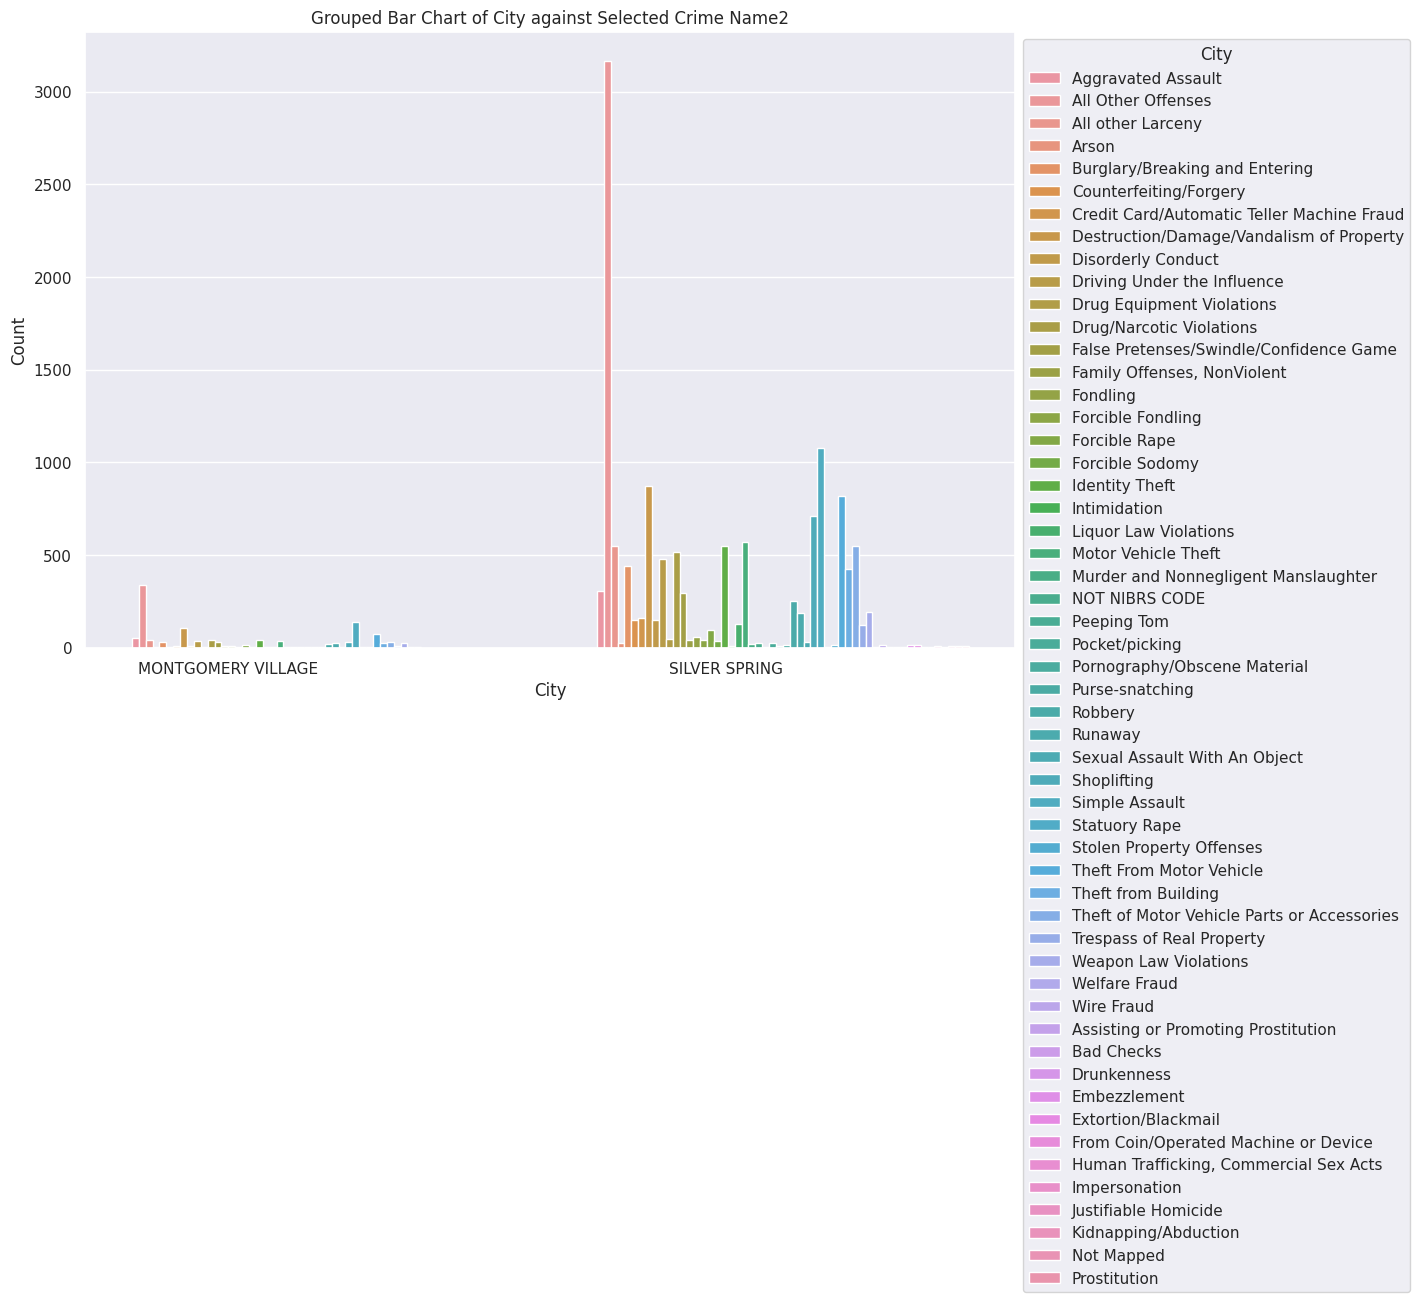

In [197]:
filtered_cities = ["SILVER SPRING", "MONTGOMERY VILLAGE"]
filtered_df = df[df['City'].isin(filtered_cities)]


grouped_data = filtered_df.groupby(['City', 'Crime Name2']).size().reset_index(name='count')


plt.figure(figsize=(12, 8))
sns.barplot(x='City', y='count', hue='Crime Name2', data=grouped_data)
plt.title('Grouped Bar Chart of City against Selected Crime Name2')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=0, ha='right')
plt.legend(title='City', bbox_to_anchor=(1, 1))

plt.show()


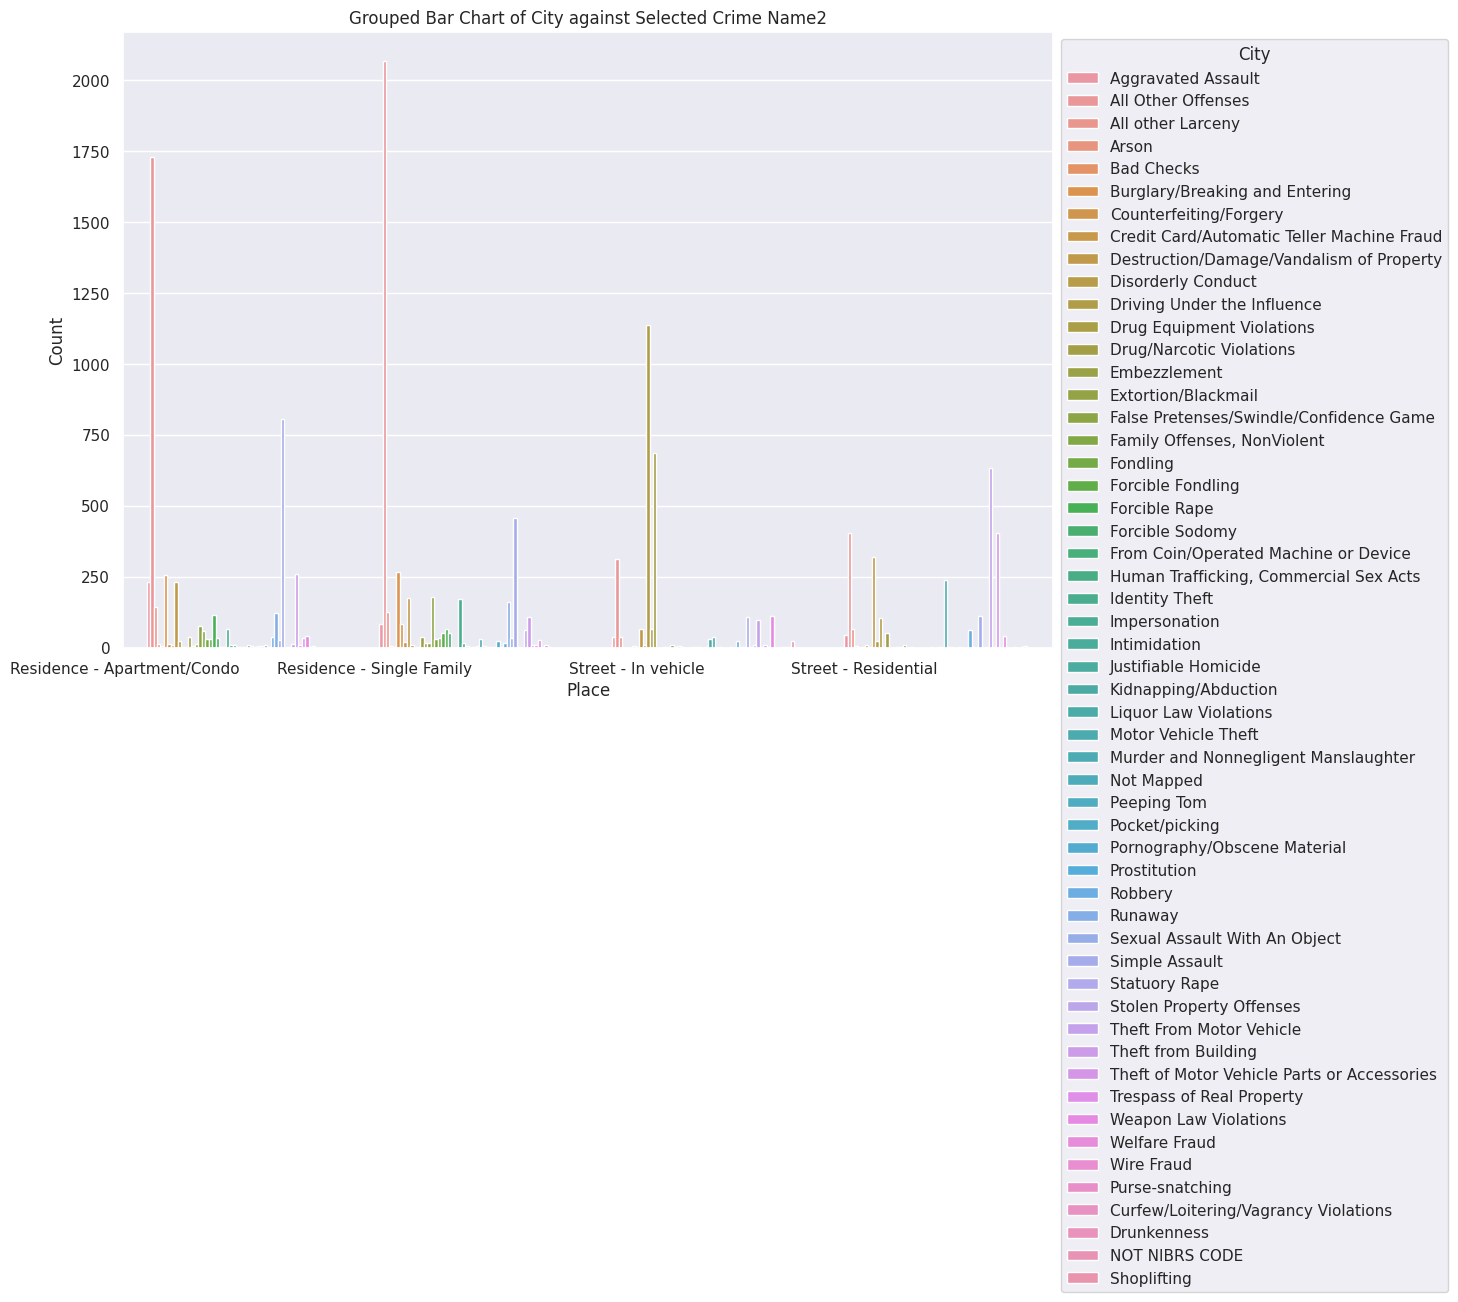

In [200]:
filtered_places = ["Residence - Apartment/Condo", "Residence - Single Family","Street - In vehicle","Street - Residential"]
filtered_df = df[df['Place'].isin(filtered_places)]


grouped_data = filtered_df.groupby(['Place', 'Crime Name2']).size().reset_index(name='count')


plt.figure(figsize=(12, 8))
sns.barplot(x='Place', y='count', hue='Crime Name2', data=grouped_data)
plt.title('Grouped Bar Chart of City against Selected Crime Name2')
plt.xlabel('Place')
plt.ylabel('Count')
plt.xticks(rotation=0, ha='right')
plt.legend(title='City', bbox_to_anchor=(1, 1))

plt.show()
